# SVM with sklearn #

This notebook creates a support vector machine for each monk. The best combination of hyperparameters is selected performing a grid search. Below there is a brief account about the implementation of each monk's support vector machine; for each monk dataset we built three different support vectore machines (with polynomial, linear and rbf kernels) and during the model selection we selected the best one that uses the best set of hyperparameters.


## Monk1 ##

Hyperparameters considered for the grid search:

* SVM with rbf kernel
    1. C 
    2. Gamma


* SVM with linear kernel
    1. C


* SVM with polynomial kernel
    1. C
    2. Gamma
    3. Degree
    
Model selection performed choosing the model with the best tuple of hyperparameters. (?)

## Monk2 ##

Hyperparameters considered for the grid search:

* SVM with rbf kernel
    1. C 
    2. Gamma


* SVM with linear kernel
    1. C


* SVM with polynomial kernel
    1. C
    2. Gamma
    3. Degree

Model selection performed choosing the model with the best tuple of hyperparameters. (?)

## Monk3 ##

Hyperparameters considered for the grid search:

* SVM with rbf kernel
    1. C 
    2. Gamma


* SVM with linear kernel
    1. C


* SVM with polynomial kernel
    1. C
    2. Gamma
    3. Degree

Model selection performed choosing the model with the best tuple of hyperparameters. (?)

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy import loadtxt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

import joblib
from pathlib import Path

## Monk 1

### Importing datasets

In [2]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk1_tr = pd.read_csv("./dataset/monk1/monks-1.train", sep = " ", skipinitialspace=True, names = colnames)
monk1_tr = monk1_tr.drop('id', axis = 1)

monk1_ts = pd.read_csv("./dataset/monk1/monks-1.test", sep = " ", skipinitialspace=True, names = colnames)
monk1_ts = monk1_ts.drop('id', axis = 1)

In [3]:
x_monk1_tr = monk1_tr.iloc[:, 1:7].values
y_monk1_tr = monk1_tr.iloc[:, 0].values

x_monk1_ts = monk1_ts.iloc[:, 1:7].values
y_monk1_ts = monk1_ts.iloc[:, 0].values

In [4]:
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk1_tr)
x_monk1_tr = one_hot_encoder_tr.transform(x_monk1_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk1_ts)
x_monk1_ts = one_hot_encoder_ts.transform(x_monk1_ts)

### Grid search

#### RBF kernel
For the SVM with an RBF kernel, the hyperparameters we can work on are *C* and *gamma*.

In [5]:
C_range = np.logspace(-2, 5, 30, base = 2)
gamma_range = np.logspace(-9, 3, 30, base = 2)

param_grid = dict(
    gamma = gamma_range,
    C = C_range
)

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'rbf'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    verbose = 4
)

grid.fit(x_monk1_tr, y_monk1_tr)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV 1/5] END .........C=0.25, gamma=0.001953125;, score=0.763 total time=   0.0s
[CV 2/5] END .........C=0.25, gamma=0.001953125;, score=0.711 total time=   0.0s
[CV 3/5] END .........C=0.25, gamma=0.001953125;, score=0.816 total time=   0.0s
[CV 4/5] END .........C=0.25, gamma=0.001953125;, score=0.763 total time=   0.0s
[CV 5/5] END .........C=0.25, gamma=0.001953125;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.25, gamma=0.002601921412571344;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.25, gamma=0.002601921412571344;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.25, gamma=0.002601921412571344;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.25, gamma=0.002601921412571344;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.25, gamma=0.002601921412571344;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.25, gamma=0.003466237459044996;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.25, gamma=0.0034662374590449

[CV 2/5] END C=0.295530576797567, gamma=0.006151578686713196;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.295530576797567, gamma=0.006151578686713196;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.295530576797567, gamma=0.006151578686713196;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.295530576797567, gamma=0.006151578686713196;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.295530576797567, gamma=0.008195033244711205;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.295530576797567, gamma=0.008195033244711205;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.295530576797567, gamma=0.008195033244711205;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.295530576797567, gamma=0.008195033244711205;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.295530576797567, gamma=0.008195033244711205;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.295530576797567, gamma=0.01091729022778783;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.295530576797567, gamma=0.01091729022778783;,

[CV 1/5] END C=0.295530576797567, gamma=1.4312159587211133;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.295530576797567, gamma=1.4312159587211133;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.295530576797567, gamma=1.4312159587211133;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.295530576797567, gamma=1.4312159587211133;, score=0.632 total time=   0.0s
[CV 5/5] END C=0.295530576797567, gamma=1.4312159587211133;, score=0.737 total time=   0.0s
[CV 1/5] END C=0.295530576797567, gamma=1.9066426618932684;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.295530576797567, gamma=1.9066426618932684;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.295530576797567, gamma=1.9066426618932684;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.295530576797567, gamma=1.9066426618932684;, score=0.632 total time=   0.0s
[CV 5/5] END C=0.295530576797567, gamma=1.9066426618932684;, score=0.737 total time=   0.0s
[CV 1/5] END C=0.295530576797567, gamma=2.5399983964682855;, score=0.789 total t

[CV 5/5] END C=0.34935328728921067, gamma=0.04580738885574762;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.34935328728921067, gamma=0.06102385966988887;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.34935328728921067, gamma=0.06102385966988887;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.34935328728921067, gamma=0.06102385966988887;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.34935328728921067, gamma=0.06102385966988887;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.34935328728921067, gamma=0.06102385966988887;, score=0.816 total time=   0.0s
[CV 1/5] END C=0.34935328728921067, gamma=0.08129499502225035;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.34935328728921067, gamma=0.08129499502225035;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.34935328728921067, gamma=0.08129499502225035;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.34935328728921067, gamma=0.08129499502225035;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.34935328728921067, gamma=0.081294

[CV 4/5] END C=0.41297831399482615, gamma=0.001953125;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.41297831399482615, gamma=0.001953125;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.41297831399482615, gamma=0.002601921412571344;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.41297831399482615, gamma=0.002601921412571344;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.41297831399482615, gamma=0.002601921412571344;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.41297831399482615, gamma=0.002601921412571344;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.41297831399482615, gamma=0.002601921412571344;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.41297831399482615, gamma=0.003466237459044996;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.41297831399482615, gamma=0.003466237459044996;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.41297831399482615, gamma=0.003466237459044996;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.41297831399482615, gamma=0.00346623745904

[CV 1/5] END C=0.488190877359111, gamma=0.01091729022778783;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.488190877359111, gamma=0.01091729022778783;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.488190877359111, gamma=0.01091729022778783;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.488190877359111, gamma=0.01091729022778783;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.488190877359111, gamma=0.01091729022778783;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.488190877359111, gamma=0.014543836779999764;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.488190877359111, gamma=0.014543836779999764;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.488190877359111, gamma=0.014543836779999764;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.488190877359111, gamma=0.014543836779999764;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.488190877359111, gamma=0.014543836779999764;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.488190877359111, gamma=0.019375063213477914;, sc

[CV 3/5] END C=0.488190877359111, gamma=2.5399983964682855;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.488190877359111, gamma=2.5399983964682855;, score=0.632 total time=   0.0s
[CV 5/5] END C=0.488190877359111, gamma=2.5399983964682855;, score=0.737 total time=   0.0s
[CV 1/5] END C=0.488190877359111, gamma=3.3837446224218675;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.488190877359111, gamma=3.3837446224218675;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.488190877359111, gamma=3.3837446224218675;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.488190877359111, gamma=3.3837446224218675;, score=0.632 total time=   0.0s
[CV 5/5] END C=0.488190877359111, gamma=3.3837446224218675;, score=0.737 total time=   0.0s
[CV 1/5] END C=0.488190877359111, gamma=4.507769644929328;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.488190877359111, gamma=4.507769644929328;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.488190877359111, gamma=4.507769644929328;, score=0.737 total time

[CV 1/5] END C=0.5771013262929934, gamma=0.14427533157324834;, score=0.868 total time=   0.0s
[CV 2/5] END C=0.5771013262929934, gamma=0.14427533157324834;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.5771013262929934, gamma=0.14427533157324834;, score=0.842 total time=   0.0s
[CV 4/5] END C=0.5771013262929934, gamma=0.14427533157324834;, score=0.711 total time=   0.0s
[CV 5/5] END C=0.5771013262929934, gamma=0.14427533157324834;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.5771013262929934, gamma=0.19220125415744788;, score=0.868 total time=   0.0s
[CV 2/5] END C=0.5771013262929934, gamma=0.19220125415744788;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.5771013262929934, gamma=0.19220125415744788;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.5771013262929934, gamma=0.19220125415744788;, score=0.711 total time=   0.0s
[CV 5/5] END C=0.5771013262929934, gamma=0.19220125415744788;, score=0.816 total time=   0.0s
[CV 1/5] END C=0.5771013262929934, gamma=0.2560473900622493;

[CV 3/5] END C=0.6822043513200371, gamma=0.004617665262461984;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.6822043513200371, gamma=0.004617665262461984;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.6822043513200371, gamma=0.004617665262461984;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.6822043513200371, gamma=0.006151578686713196;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.6822043513200371, gamma=0.006151578686713196;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.6822043513200371, gamma=0.006151578686713196;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.6822043513200371, gamma=0.006151578686713196;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.6822043513200371, gamma=0.006151578686713196;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.6822043513200371, gamma=0.008195033244711205;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.6822043513200371, gamma=0.008195033244711205;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.6822043513200371, gamma=0.0081950

[CV 3/5] END C=0.8064489817576824, gamma=0.006151578686713196;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.8064489817576824, gamma=0.006151578686713196;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.8064489817576824, gamma=0.006151578686713196;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.8064489817576824, gamma=0.008195033244711205;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.8064489817576824, gamma=0.008195033244711205;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.8064489817576824, gamma=0.008195033244711205;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.8064489817576824, gamma=0.008195033244711205;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.8064489817576824, gamma=0.008195033244711205;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.8064489817576824, gamma=0.01091729022778783;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.8064489817576824, gamma=0.01091729022778783;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.8064489817576824, gamma=0.010917290

[CV 2/5] END C=0.953321330946634, gamma=0.002601921412571344;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.953321330946634, gamma=0.002601921412571344;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.953321330946634, gamma=0.002601921412571344;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.953321330946634, gamma=0.002601921412571344;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.953321330946634, gamma=0.003466237459044996;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.953321330946634, gamma=0.003466237459044996;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.953321330946634, gamma=0.003466237459044996;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.953321330946634, gamma=0.003466237459044996;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.953321330946634, gamma=0.003466237459044996;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.953321330946634, gamma=0.004617665262461984;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.953321330946634, gamma=0.004617665262461984

[CV 5/5] END C=1.126942411232332, gamma=0.002601921412571344;, score=0.789 total time=   0.0s
[CV 1/5] END C=1.126942411232332, gamma=0.003466237459044996;, score=0.763 total time=   0.0s
[CV 2/5] END C=1.126942411232332, gamma=0.003466237459044996;, score=0.711 total time=   0.0s
[CV 3/5] END C=1.126942411232332, gamma=0.003466237459044996;, score=0.816 total time=   0.0s
[CV 4/5] END C=1.126942411232332, gamma=0.003466237459044996;, score=0.763 total time=   0.0s
[CV 5/5] END C=1.126942411232332, gamma=0.003466237459044996;, score=0.789 total time=   0.0s
[CV 1/5] END C=1.126942411232332, gamma=0.004617665262461984;, score=0.763 total time=   0.0s
[CV 2/5] END C=1.126942411232332, gamma=0.004617665262461984;, score=0.711 total time=   0.0s
[CV 3/5] END C=1.126942411232332, gamma=0.004617665262461984;, score=0.816 total time=   0.0s
[CV 4/5] END C=1.126942411232332, gamma=0.004617665262461984;, score=0.763 total time=   0.0s
[CV 5/5] END C=1.126942411232332, gamma=0.004617665262461984

[CV 1/5] END C=1.332183763236528, gamma=0.002601921412571344;, score=0.763 total time=   0.0s
[CV 2/5] END C=1.332183763236528, gamma=0.002601921412571344;, score=0.711 total time=   0.0s
[CV 3/5] END C=1.332183763236528, gamma=0.002601921412571344;, score=0.816 total time=   0.0s
[CV 4/5] END C=1.332183763236528, gamma=0.002601921412571344;, score=0.763 total time=   0.0s
[CV 5/5] END C=1.332183763236528, gamma=0.002601921412571344;, score=0.789 total time=   0.0s
[CV 1/5] END C=1.332183763236528, gamma=0.003466237459044996;, score=0.763 total time=   0.0s
[CV 2/5] END C=1.332183763236528, gamma=0.003466237459044996;, score=0.711 total time=   0.0s
[CV 3/5] END C=1.332183763236528, gamma=0.003466237459044996;, score=0.816 total time=   0.0s
[CV 4/5] END C=1.332183763236528, gamma=0.003466237459044996;, score=0.763 total time=   0.0s
[CV 5/5] END C=1.332183763236528, gamma=0.003466237459044996;, score=0.789 total time=   0.0s
[CV 1/5] END C=1.332183763236528, gamma=0.004617665262461984

[CV 5/5] END C=1.5748041437985787, gamma=0.003466237459044996;, score=0.789 total time=   0.0s
[CV 1/5] END C=1.5748041437985787, gamma=0.004617665262461984;, score=0.763 total time=   0.0s
[CV 2/5] END C=1.5748041437985787, gamma=0.004617665262461984;, score=0.711 total time=   0.0s
[CV 3/5] END C=1.5748041437985787, gamma=0.004617665262461984;, score=0.816 total time=   0.0s
[CV 4/5] END C=1.5748041437985787, gamma=0.004617665262461984;, score=0.763 total time=   0.0s
[CV 5/5] END C=1.5748041437985787, gamma=0.004617665262461984;, score=0.789 total time=   0.0s
[CV 1/5] END C=1.5748041437985787, gamma=0.006151578686713196;, score=0.763 total time=   0.0s
[CV 2/5] END C=1.5748041437985787, gamma=0.006151578686713196;, score=0.711 total time=   0.0s
[CV 3/5] END C=1.5748041437985787, gamma=0.006151578686713196;, score=0.816 total time=   0.0s
[CV 4/5] END C=1.5748041437985787, gamma=0.006151578686713196;, score=0.763 total time=   0.0s
[CV 5/5] END C=1.5748041437985787, gamma=0.0061515

[CV 2/5] END C=1.5748041437985787, gamma=0.8064489817576826;, score=0.789 total time=   0.0s
[CV 3/5] END C=1.5748041437985787, gamma=0.8064489817576826;, score=0.868 total time=   0.0s
[CV 4/5] END C=1.5748041437985787, gamma=0.8064489817576826;, score=0.737 total time=   0.0s
[CV 5/5] END C=1.5748041437985787, gamma=0.8064489817576826;, score=0.842 total time=   0.0s
[CV 1/5] END C=1.5748041437985787, gamma=1.074338239376216;, score=0.842 total time=   0.0s
[CV 2/5] END C=1.5748041437985787, gamma=1.074338239376216;, score=0.789 total time=   0.0s
[CV 3/5] END C=1.5748041437985787, gamma=1.074338239376216;, score=0.842 total time=   0.0s
[CV 4/5] END C=1.5748041437985787, gamma=1.074338239376216;, score=0.711 total time=   0.0s
[CV 5/5] END C=1.5748041437985787, gamma=1.074338239376216;, score=0.789 total time=   0.0s
[CV 1/5] END C=1.5748041437985787, gamma=1.4312159587211133;, score=0.842 total time=   0.0s
[CV 2/5] END C=1.5748041437985787, gamma=1.4312159587211133;, score=0.789 t

[CV 1/5] END C=1.8616111078399704, gamma=1.9066426618932684;, score=0.789 total time=   0.0s
[CV 2/5] END C=1.8616111078399704, gamma=1.9066426618932684;, score=0.789 total time=   0.0s
[CV 3/5] END C=1.8616111078399704, gamma=1.9066426618932684;, score=0.711 total time=   0.0s
[CV 4/5] END C=1.8616111078399704, gamma=1.9066426618932684;, score=0.658 total time=   0.0s
[CV 5/5] END C=1.8616111078399704, gamma=1.9066426618932684;, score=0.658 total time=   0.0s
[CV 1/5] END C=1.8616111078399704, gamma=2.5399983964682855;, score=0.789 total time=   0.0s
[CV 2/5] END C=1.8616111078399704, gamma=2.5399983964682855;, score=0.789 total time=   0.0s
[CV 3/5] END C=1.8616111078399704, gamma=2.5399983964682855;, score=0.711 total time=   0.0s
[CV 4/5] END C=1.8616111078399704, gamma=2.5399983964682855;, score=0.632 total time=   0.0s
[CV 5/5] END C=1.8616111078399704, gamma=2.5399983964682855;, score=0.658 total time=   0.0s
[CV 1/5] END C=1.8616111078399704, gamma=3.3837446224218675;, score=0.

[CV 2/5] END C=2.200652017890817, gamma=0.1082998724010363;, score=0.763 total time=   0.0s
[CV 3/5] END C=2.200652017890817, gamma=0.1082998724010363;, score=0.895 total time=   0.0s
[CV 4/5] END C=2.200652017890817, gamma=0.1082998724010363;, score=0.763 total time=   0.0s
[CV 5/5] END C=2.200652017890817, gamma=0.1082998724010363;, score=0.842 total time=   0.0s
[CV 1/5] END C=2.200652017890817, gamma=0.14427533157324834;, score=0.895 total time=   0.0s
[CV 2/5] END C=2.200652017890817, gamma=0.14427533157324834;, score=0.816 total time=   0.0s
[CV 3/5] END C=2.200652017890817, gamma=0.14427533157324834;, score=0.895 total time=   0.0s
[CV 4/5] END C=2.200652017890817, gamma=0.14427533157324834;, score=0.816 total time=   0.0s
[CV 5/5] END C=2.200652017890817, gamma=0.14427533157324834;, score=0.868 total time=   0.0s
[CV 1/5] END C=2.200652017890817, gamma=0.19220125415744788;, score=0.921 total time=   0.0s
[CV 2/5] END C=2.200652017890817, gamma=0.19220125415744788;, score=0.816 

[CV 3/5] END C=2.601439840712011, gamma=0.004617665262461984;, score=0.816 total time=   0.0s
[CV 4/5] END C=2.601439840712011, gamma=0.004617665262461984;, score=0.763 total time=   0.0s
[CV 5/5] END C=2.601439840712011, gamma=0.004617665262461984;, score=0.789 total time=   0.0s
[CV 1/5] END C=2.601439840712011, gamma=0.006151578686713196;, score=0.789 total time=   0.0s
[CV 2/5] END C=2.601439840712011, gamma=0.006151578686713196;, score=0.684 total time=   0.0s
[CV 3/5] END C=2.601439840712011, gamma=0.006151578686713196;, score=0.816 total time=   0.0s
[CV 4/5] END C=2.601439840712011, gamma=0.006151578686713196;, score=0.763 total time=   0.0s
[CV 5/5] END C=2.601439840712011, gamma=0.006151578686713196;, score=0.789 total time=   0.0s
[CV 1/5] END C=2.601439840712011, gamma=0.008195033244711205;, score=0.763 total time=   0.0s
[CV 2/5] END C=2.601439840712011, gamma=0.008195033244711205;, score=0.711 total time=   0.0s
[CV 3/5] END C=2.601439840712011, gamma=0.008195033244711205

[CV 3/5] END C=2.601439840712011, gamma=0.8064489817576826;, score=0.868 total time=   0.0s
[CV 4/5] END C=2.601439840712011, gamma=0.8064489817576826;, score=0.737 total time=   0.0s
[CV 5/5] END C=2.601439840712011, gamma=0.8064489817576826;, score=0.842 total time=   0.0s
[CV 1/5] END C=2.601439840712011, gamma=1.074338239376216;, score=0.842 total time=   0.0s
[CV 2/5] END C=2.601439840712011, gamma=1.074338239376216;, score=0.789 total time=   0.0s
[CV 3/5] END C=2.601439840712011, gamma=1.074338239376216;, score=0.842 total time=   0.0s
[CV 4/5] END C=2.601439840712011, gamma=1.074338239376216;, score=0.711 total time=   0.0s
[CV 5/5] END C=2.601439840712011, gamma=1.074338239376216;, score=0.789 total time=   0.0s
[CV 1/5] END C=2.601439840712011, gamma=1.4312159587211133;, score=0.842 total time=   0.0s
[CV 2/5] END C=2.601439840712011, gamma=1.4312159587211133;, score=0.789 total time=   0.0s
[CV 3/5] END C=2.601439840712011, gamma=1.4312159587211133;, score=0.763 total time= 

[CV 4/5] END C=3.075220066519167, gamma=0.04580738885574762;, score=0.711 total time=   0.0s
[CV 5/5] END C=3.075220066519167, gamma=0.04580738885574762;, score=0.763 total time=   0.0s
[CV 1/5] END C=3.075220066519167, gamma=0.06102385966988887;, score=0.789 total time=   0.0s
[CV 2/5] END C=3.075220066519167, gamma=0.06102385966988887;, score=0.763 total time=   0.0s
[CV 3/5] END C=3.075220066519167, gamma=0.06102385966988887;, score=0.842 total time=   0.0s
[CV 4/5] END C=3.075220066519167, gamma=0.06102385966988887;, score=0.711 total time=   0.0s
[CV 5/5] END C=3.075220066519167, gamma=0.06102385966988887;, score=0.789 total time=   0.0s
[CV 1/5] END C=3.075220066519167, gamma=0.08129499502225035;, score=0.816 total time=   0.0s
[CV 2/5] END C=3.075220066519167, gamma=0.08129499502225035;, score=0.763 total time=   0.0s
[CV 3/5] END C=3.075220066519167, gamma=0.08129499502225035;, score=0.895 total time=   0.0s
[CV 4/5] END C=3.075220066519167, gamma=0.08129499502225035;, score=0.

[CV 5/5] END C=3.6352862401514465, gamma=0.014543836779999764;, score=0.737 total time=   0.0s
[CV 1/5] END C=3.6352862401514465, gamma=0.019375063213477914;, score=0.763 total time=   0.0s
[CV 2/5] END C=3.6352862401514465, gamma=0.019375063213477914;, score=0.684 total time=   0.0s
[CV 3/5] END C=3.6352862401514465, gamma=0.019375063213477914;, score=0.842 total time=   0.0s
[CV 4/5] END C=3.6352862401514465, gamma=0.019375063213477914;, score=0.711 total time=   0.0s
[CV 5/5] END C=3.6352862401514465, gamma=0.019375063213477914;, score=0.737 total time=   0.0s
[CV 1/5] END C=3.6352862401514465, gamma=0.025811144624676628;, score=0.816 total time=   0.0s
[CV 2/5] END C=3.6352862401514465, gamma=0.025811144624676628;, score=0.684 total time=   0.0s
[CV 3/5] END C=3.6352862401514465, gamma=0.025811144624676628;, score=0.842 total time=   0.0s
[CV 4/5] END C=3.6352862401514465, gamma=0.025811144624676628;, score=0.711 total time=   0.0s
[CV 5/5] END C=3.6352862401514465, gamma=0.0258111

[CV 4/5] END C=4.297352957504864, gamma=0.14427533157324834;, score=0.895 total time=   0.0s
[CV 5/5] END C=4.297352957504864, gamma=0.14427533157324834;, score=0.921 total time=   0.0s
[CV 1/5] END C=4.297352957504864, gamma=0.19220125415744788;, score=0.921 total time=   0.0s
[CV 2/5] END C=4.297352957504864, gamma=0.19220125415744788;, score=0.816 total time=   0.0s
[CV 3/5] END C=4.297352957504864, gamma=0.19220125415744788;, score=0.974 total time=   0.0s
[CV 4/5] END C=4.297352957504864, gamma=0.19220125415744788;, score=0.921 total time=   0.0s
[CV 5/5] END C=4.297352957504864, gamma=0.19220125415744788;, score=0.974 total time=   0.0s
[CV 1/5] END C=4.297352957504864, gamma=0.2560473900622493;, score=0.947 total time=   0.0s
[CV 2/5] END C=4.297352957504864, gamma=0.2560473900622493;, score=0.816 total time=   0.0s
[CV 3/5] END C=4.297352957504864, gamma=0.2560473900622493;, score=0.947 total time=   0.0s
[CV 4/5] END C=4.297352957504864, gamma=0.2560473900622493;, score=0.921 

[CV 1/5] END C=5.079996792936571, gamma=0.01091729022778783;, score=0.763 total time=   0.0s
[CV 2/5] END C=5.079996792936571, gamma=0.01091729022778783;, score=0.684 total time=   0.0s
[CV 3/5] END C=5.079996792936571, gamma=0.01091729022778783;, score=0.842 total time=   0.0s
[CV 4/5] END C=5.079996792936571, gamma=0.01091729022778783;, score=0.711 total time=   0.0s
[CV 5/5] END C=5.079996792936571, gamma=0.01091729022778783;, score=0.737 total time=   0.0s
[CV 1/5] END C=5.079996792936571, gamma=0.014543836779999764;, score=0.763 total time=   0.0s
[CV 2/5] END C=5.079996792936571, gamma=0.014543836779999764;, score=0.684 total time=   0.0s
[CV 3/5] END C=5.079996792936571, gamma=0.014543836779999764;, score=0.842 total time=   0.0s
[CV 4/5] END C=5.079996792936571, gamma=0.014543836779999764;, score=0.711 total time=   0.0s
[CV 5/5] END C=5.079996792936571, gamma=0.014543836779999764;, score=0.737 total time=   0.0s
[CV 1/5] END C=5.079996792936571, gamma=0.019375063213477914;, sc

[CV 3/5] END C=6.005177529385341, gamma=0.06102385966988887;, score=0.895 total time=   0.0s
[CV 4/5] END C=6.005177529385341, gamma=0.06102385966988887;, score=0.763 total time=   0.0s
[CV 5/5] END C=6.005177529385341, gamma=0.06102385966988887;, score=0.842 total time=   0.0s
[CV 1/5] END C=6.005177529385341, gamma=0.08129499502225035;, score=0.895 total time=   0.0s
[CV 2/5] END C=6.005177529385341, gamma=0.08129499502225035;, score=0.816 total time=   0.0s
[CV 3/5] END C=6.005177529385341, gamma=0.08129499502225035;, score=0.895 total time=   0.0s
[CV 4/5] END C=6.005177529385341, gamma=0.08129499502225035;, score=0.816 total time=   0.0s
[CV 5/5] END C=6.005177529385341, gamma=0.08129499502225035;, score=0.895 total time=   0.0s
[CV 1/5] END C=6.005177529385341, gamma=0.1082998724010363;, score=0.921 total time=   0.0s
[CV 2/5] END C=6.005177529385341, gamma=0.1082998724010363;, score=0.816 total time=   0.0s
[CV 3/5] END C=6.005177529385341, gamma=0.1082998724010363;, score=0.974

[CV 1/5] END C=7.098854316124152, gamma=0.002601921412571344;, score=0.789 total time=   0.0s
[CV 2/5] END C=7.098854316124152, gamma=0.002601921412571344;, score=0.711 total time=   0.0s
[CV 3/5] END C=7.098854316124152, gamma=0.002601921412571344;, score=0.789 total time=   0.0s
[CV 4/5] END C=7.098854316124152, gamma=0.002601921412571344;, score=0.711 total time=   0.0s
[CV 5/5] END C=7.098854316124152, gamma=0.002601921412571344;, score=0.763 total time=   0.0s
[CV 1/5] END C=7.098854316124152, gamma=0.003466237459044996;, score=0.816 total time=   0.0s
[CV 2/5] END C=7.098854316124152, gamma=0.003466237459044996;, score=0.684 total time=   0.0s
[CV 3/5] END C=7.098854316124152, gamma=0.003466237459044996;, score=0.763 total time=   0.0s
[CV 4/5] END C=7.098854316124152, gamma=0.003466237459044996;, score=0.711 total time=   0.0s
[CV 5/5] END C=7.098854316124152, gamma=0.003466237459044996;, score=0.737 total time=   0.0s
[CV 1/5] END C=7.098854316124152, gamma=0.004617665262461984

[CV 4/5] END C=8.39171404258428, gamma=0.01091729022778783;, score=0.711 total time=   0.0s
[CV 5/5] END C=8.39171404258428, gamma=0.01091729022778783;, score=0.737 total time=   0.0s
[CV 1/5] END C=8.39171404258428, gamma=0.014543836779999764;, score=0.763 total time=   0.0s
[CV 2/5] END C=8.39171404258428, gamma=0.014543836779999764;, score=0.684 total time=   0.0s
[CV 3/5] END C=8.39171404258428, gamma=0.014543836779999764;, score=0.842 total time=   0.0s
[CV 4/5] END C=8.39171404258428, gamma=0.014543836779999764;, score=0.711 total time=   0.0s
[CV 5/5] END C=8.39171404258428, gamma=0.014543836779999764;, score=0.737 total time=   0.0s
[CV 1/5] END C=8.39171404258428, gamma=0.019375063213477914;, score=0.711 total time=   0.0s
[CV 2/5] END C=8.39171404258428, gamma=0.019375063213477914;, score=0.684 total time=   0.0s
[CV 3/5] END C=8.39171404258428, gamma=0.019375063213477914;, score=0.842 total time=   0.0s
[CV 4/5] END C=8.39171404258428, gamma=0.019375063213477914;, score=0.71

[CV 4/5] END C=9.920032365300699, gamma=0.025811144624676628;, score=0.711 total time=   0.0s
[CV 5/5] END C=9.920032365300699, gamma=0.025811144624676628;, score=0.789 total time=   0.0s
[CV 1/5] END C=9.920032365300699, gamma=0.03438518777954402;, score=0.737 total time=   0.0s
[CV 2/5] END C=9.920032365300699, gamma=0.03438518777954402;, score=0.737 total time=   0.0s
[CV 3/5] END C=9.920032365300699, gamma=0.03438518777954402;, score=0.842 total time=   0.0s
[CV 4/5] END C=9.920032365300699, gamma=0.03438518777954402;, score=0.711 total time=   0.0s
[CV 5/5] END C=9.920032365300699, gamma=0.03438518777954402;, score=0.816 total time=   0.0s
[CV 1/5] END C=9.920032365300699, gamma=0.04580738885574762;, score=0.842 total time=   0.0s
[CV 2/5] END C=9.920032365300699, gamma=0.04580738885574762;, score=0.763 total time=   0.0s
[CV 3/5] END C=9.920032365300699, gamma=0.04580738885574762;, score=0.895 total time=   0.0s
[CV 4/5] END C=9.920032365300699, gamma=0.04580738885574762;, score=

[CV 3/5] END C=11.726691547071391, gamma=0.14427533157324834;, score=1.000 total time=   0.0s
[CV 4/5] END C=11.726691547071391, gamma=0.14427533157324834;, score=0.947 total time=   0.0s
[CV 5/5] END C=11.726691547071391, gamma=0.14427533157324834;, score=1.000 total time=   0.0s
[CV 1/5] END C=11.726691547071391, gamma=0.19220125415744788;, score=0.974 total time=   0.0s
[CV 2/5] END C=11.726691547071391, gamma=0.19220125415744788;, score=0.816 total time=   0.0s
[CV 3/5] END C=11.726691547071391, gamma=0.19220125415744788;, score=0.974 total time=   0.0s
[CV 4/5] END C=11.726691547071391, gamma=0.19220125415744788;, score=0.947 total time=   0.0s
[CV 5/5] END C=11.726691547071391, gamma=0.19220125415744788;, score=1.000 total time=   0.0s
[CV 1/5] END C=11.726691547071391, gamma=0.2560473900622493;, score=0.947 total time=   0.0s
[CV 2/5] END C=11.726691547071391, gamma=0.2560473900622493;, score=0.816 total time=   0.0s
[CV 3/5] END C=11.726691547071391, gamma=0.2560473900622493;, 

[CV 2/5] END C=13.862383667332647, gamma=0.006151578686713196;, score=0.684 total time=   0.0s
[CV 3/5] END C=13.862383667332647, gamma=0.006151578686713196;, score=0.842 total time=   0.0s
[CV 4/5] END C=13.862383667332647, gamma=0.006151578686713196;, score=0.711 total time=   0.0s
[CV 5/5] END C=13.862383667332647, gamma=0.006151578686713196;, score=0.737 total time=   0.0s
[CV 1/5] END C=13.862383667332647, gamma=0.008195033244711205;, score=0.763 total time=   0.0s
[CV 2/5] END C=13.862383667332647, gamma=0.008195033244711205;, score=0.684 total time=   0.0s
[CV 3/5] END C=13.862383667332647, gamma=0.008195033244711205;, score=0.842 total time=   0.0s
[CV 4/5] END C=13.862383667332647, gamma=0.008195033244711205;, score=0.711 total time=   0.0s
[CV 5/5] END C=13.862383667332647, gamma=0.008195033244711205;, score=0.737 total time=   0.0s
[CV 1/5] END C=13.862383667332647, gamma=0.01091729022778783;, score=0.711 total time=   0.0s
[CV 2/5] END C=13.862383667332647, gamma=0.01091729

[CV 3/5] END C=13.862383667332647, gamma=1.074338239376216;, score=0.842 total time=   0.0s
[CV 4/5] END C=13.862383667332647, gamma=1.074338239376216;, score=0.711 total time=   0.0s
[CV 5/5] END C=13.862383667332647, gamma=1.074338239376216;, score=0.789 total time=   0.0s
[CV 1/5] END C=13.862383667332647, gamma=1.4312159587211133;, score=0.842 total time=   0.0s
[CV 2/5] END C=13.862383667332647, gamma=1.4312159587211133;, score=0.789 total time=   0.0s
[CV 3/5] END C=13.862383667332647, gamma=1.4312159587211133;, score=0.763 total time=   0.0s
[CV 4/5] END C=13.862383667332647, gamma=1.4312159587211133;, score=0.711 total time=   0.0s
[CV 5/5] END C=13.862383667332647, gamma=1.4312159587211133;, score=0.658 total time=   0.0s
[CV 1/5] END C=13.862383667332647, gamma=1.9066426618932684;, score=0.789 total time=   0.0s
[CV 2/5] END C=13.862383667332647, gamma=1.9066426618932684;, score=0.789 total time=   0.0s
[CV 3/5] END C=13.862383667332647, gamma=1.9066426618932684;, score=0.711

[CV 5/5] END C=16.387032963983955, gamma=0.06102385966988887;, score=0.947 total time=   0.0s
[CV 1/5] END C=16.387032963983955, gamma=0.08129499502225035;, score=0.974 total time=   0.0s
[CV 2/5] END C=16.387032963983955, gamma=0.08129499502225035;, score=0.816 total time=   0.0s
[CV 3/5] END C=16.387032963983955, gamma=0.08129499502225035;, score=1.000 total time=   0.0s
[CV 4/5] END C=16.387032963983955, gamma=0.08129499502225035;, score=0.947 total time=   0.0s
[CV 5/5] END C=16.387032963983955, gamma=0.08129499502225035;, score=1.000 total time=   0.0s
[CV 1/5] END C=16.387032963983955, gamma=0.1082998724010363;, score=0.974 total time=   0.0s
[CV 2/5] END C=16.387032963983955, gamma=0.1082998724010363;, score=0.816 total time=   0.0s
[CV 3/5] END C=16.387032963983955, gamma=0.1082998724010363;, score=1.000 total time=   0.0s
[CV 4/5] END C=16.387032963983955, gamma=0.1082998724010363;, score=0.947 total time=   0.0s
[CV 5/5] END C=16.387032963983955, gamma=0.1082998724010363;, sc

[CV 5/5] END C=19.3714772153877, gamma=0.3411021756600185;, score=0.947 total time=   0.0s
[CV 1/5] END C=19.3714772153877, gamma=0.4544107800189307;, score=0.868 total time=   0.0s
[CV 2/5] END C=19.3714772153877, gamma=0.4544107800189307;, score=0.789 total time=   0.0s
[CV 3/5] END C=19.3714772153877, gamma=0.4544107800189307;, score=0.921 total time=   0.0s
[CV 4/5] END C=19.3714772153877, gamma=0.4544107800189307;, score=0.816 total time=   0.0s
[CV 5/5] END C=19.3714772153877, gamma=0.4544107800189307;, score=0.921 total time=   0.0s
[CV 1/5] END C=19.3714772153877, gamma=0.6053586629808656;, score=0.868 total time=   0.0s
[CV 2/5] END C=19.3714772153877, gamma=0.6053586629808656;, score=0.789 total time=   0.0s
[CV 3/5] END C=19.3714772153877, gamma=0.6053586629808656;, score=0.895 total time=   0.0s
[CV 4/5] END C=19.3714772153877, gamma=0.6053586629808656;, score=0.789 total time=   0.0s
[CV 5/5] END C=19.3714772153877, gamma=0.6053586629808656;, score=0.868 total time=   0.0s

[CV 3/5] END C=22.899455339537813, gamma=0.8064489817576826;, score=0.868 total time=   0.0s
[CV 4/5] END C=22.899455339537813, gamma=0.8064489817576826;, score=0.737 total time=   0.0s
[CV 5/5] END C=22.899455339537813, gamma=0.8064489817576826;, score=0.842 total time=   0.0s
[CV 1/5] END C=22.899455339537813, gamma=1.074338239376216;, score=0.842 total time=   0.0s
[CV 2/5] END C=22.899455339537813, gamma=1.074338239376216;, score=0.789 total time=   0.0s
[CV 3/5] END C=22.899455339537813, gamma=1.074338239376216;, score=0.842 total time=   0.0s
[CV 4/5] END C=22.899455339537813, gamma=1.074338239376216;, score=0.711 total time=   0.0s
[CV 5/5] END C=22.899455339537813, gamma=1.074338239376216;, score=0.789 total time=   0.0s
[CV 1/5] END C=22.899455339537813, gamma=1.4312159587211133;, score=0.842 total time=   0.0s
[CV 2/5] END C=22.899455339537813, gamma=1.4312159587211133;, score=0.789 total time=   0.0s
[CV 3/5] END C=22.899455339537813, gamma=1.4312159587211133;, score=0.763 t

[CV 5/5] END C=27.06995697937494, gamma=0.025811144624676628;, score=0.842 total time=   0.0s
[CV 1/5] END C=27.06995697937494, gamma=0.03438518777954402;, score=0.895 total time=   0.0s
[CV 2/5] END C=27.06995697937494, gamma=0.03438518777954402;, score=0.816 total time=   0.0s
[CV 3/5] END C=27.06995697937494, gamma=0.03438518777954402;, score=0.895 total time=   0.0s
[CV 4/5] END C=27.06995697937494, gamma=0.03438518777954402;, score=0.789 total time=   0.0s
[CV 5/5] END C=27.06995697937494, gamma=0.03438518777954402;, score=0.895 total time=   0.0s
[CV 1/5] END C=27.06995697937494, gamma=0.04580738885574762;, score=0.921 total time=   0.0s
[CV 2/5] END C=27.06995697937494, gamma=0.04580738885574762;, score=0.816 total time=   0.0s
[CV 3/5] END C=27.06995697937494, gamma=0.04580738885574762;, score=0.974 total time=   0.0s
[CV 4/5] END C=27.06995697937494, gamma=0.04580738885574762;, score=0.895 total time=   0.0s
[CV 5/5] END C=27.06995697937494, gamma=0.04580738885574762;, score=0

[CV 1/5] END ..C=32.0, gamma=0.1082998724010363;, score=1.000 total time=   0.0s
[CV 2/5] END ..C=32.0, gamma=0.1082998724010363;, score=0.816 total time=   0.0s
[CV 3/5] END ..C=32.0, gamma=0.1082998724010363;, score=1.000 total time=   0.0s
[CV 4/5] END ..C=32.0, gamma=0.1082998724010363;, score=0.947 total time=   0.0s
[CV 5/5] END ..C=32.0, gamma=0.1082998724010363;, score=1.000 total time=   0.0s
[CV 1/5] END .C=32.0, gamma=0.14427533157324834;, score=0.974 total time=   0.0s
[CV 2/5] END .C=32.0, gamma=0.14427533157324834;, score=0.816 total time=   0.0s
[CV 3/5] END .C=32.0, gamma=0.14427533157324834;, score=1.000 total time=   0.0s
[CV 4/5] END .C=32.0, gamma=0.14427533157324834;, score=0.947 total time=   0.0s
[CV 5/5] END .C=32.0, gamma=0.14427533157324834;, score=1.000 total time=   0.0s
[CV 1/5] END .C=32.0, gamma=0.19220125415744788;, score=0.974 total time=   0.0s
[CV 2/5] END .C=32.0, gamma=0.19220125415744788;, score=0.816 total time=   0.0s
[CV 3/5] END .C=32.0, gamma=

In [6]:
rbf_classifier = SVC(
    C = grid.best_params_['C'],
    gamma = grid.best_params_['gamma'],
    kernel = 'rbf'
)
rbf_classifier.fit(x_monk1_tr, y_monk1_tr)

SVC(C=27.06995697937494, gamma=0.08129499502225035)

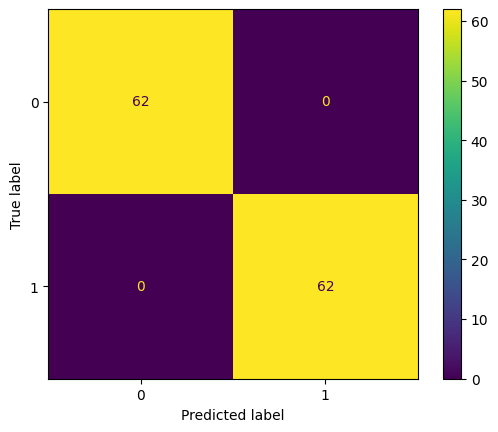

In [7]:
predictions = rbf_classifier.predict(x_monk1_tr)

cm = confusion_matrix(y_monk1_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Linear kernel
For the SVM with an linear kernel, the hyperparameter we can work on is *C*.

In [8]:
C_range = np.logspace(-2, 10, 50, base = 2)

param_grid = dict(
    C = C_range
)

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'linear'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    verbose = 4
)

grid.fit(x_monk1_tr, y_monk1_tr)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ............................C=0.25;, score=0.737 total time=   0.0s
[CV 2/5] END ............................C=0.25;, score=0.842 total time=   0.0s
[CV 3/5] END ............................C=0.25;, score=0.684 total time=   0.0s
[CV 4/5] END ............................C=0.25;, score=0.868 total time=   0.0s
[CV 5/5] END ............................C=0.25;, score=0.737 total time=   0.0s
[CV 1/5] END .............C=0.29625223827969416;, score=0.763 total time=   0.0s
[CV 2/5] END .............C=0.29625223827969416;, score=0.816 total time=   0.0s
[CV 3/5] END .............C=0.29625223827969416;, score=0.684 total time=   0.0s
[CV 4/5] END .............C=0.29625223827969416;, score=0.816 total time=   0.0s
[CV 5/5] END .............C=0.29625223827969416;, score=0.737 total time=   0.0s
[CV 1/5] END ..............C=0.3510615547429147;, score=0.763 total time=   0.0s
[CV 2/5] END ..............C=0.3510615547429147

[CV 4/5] END ...............C=12.40330819986167;, score=0.816 total time=   0.0s
[CV 5/5] END ...............C=12.40330819986167;, score=0.632 total time=   0.0s
[CV 1/5] END ..............C=14.698031265127607;, score=0.895 total time=   0.0s
[CV 2/5] END ..............C=14.698031265127607;, score=0.868 total time=   0.0s
[CV 3/5] END ..............C=14.698031265127607;, score=0.816 total time=   0.0s
[CV 4/5] END ..............C=14.698031265127607;, score=0.816 total time=   0.0s
[CV 5/5] END ..............C=14.698031265127607;, score=0.658 total time=   0.0s
[CV 1/5] END ..............C=17.417298642395917;, score=0.895 total time=   0.0s
[CV 2/5] END ..............C=17.417298642395917;, score=0.868 total time=   0.0s
[CV 3/5] END ..............C=17.417298642395917;, score=0.816 total time=   0.0s
[CV 4/5] END ..............C=17.417298642395917;, score=0.816 total time=   0.0s
[CV 5/5] END ..............C=17.417298642395917;, score=0.632 total time=   0.0s
[CV 1/5] END ...............

[CV 1/5] END ...............C=438.2196005866136;, score=0.895 total time=   0.0s
[CV 2/5] END ...............C=438.2196005866136;, score=0.868 total time=   0.0s
[CV 3/5] END ...............C=438.2196005866136;, score=0.816 total time=   0.0s
[CV 4/5] END ...............C=438.2196005866136;, score=0.816 total time=   0.0s
[CV 5/5] END ...............C=438.2196005866136;, score=0.658 total time=   0.0s
[CV 1/5] END ...............C=519.2941501272711;, score=0.895 total time=   0.0s
[CV 2/5] END ...............C=519.2941501272711;, score=0.868 total time=   0.0s
[CV 3/5] END ...............C=519.2941501272711;, score=0.816 total time=   0.0s
[CV 4/5] END ...............C=519.2941501272711;, score=0.816 total time=   0.0s
[CV 5/5] END ...............C=519.2941501272711;, score=0.658 total time=   0.0s
[CV 1/5] END ...............C=615.3682172030229;, score=0.895 total time=   0.0s
[CV 2/5] END ...............C=615.3682172030229;, score=0.868 total time=   0.0s
[CV 3/5] END ...............

In [9]:
linear_classifier = SVC(
    C = grid.best_params_['C'],
    kernel = 'linear'
)
linear_classifier.fit(x_monk1_tr, y_monk1_tr)

SVC(C=0.6922608929229022, kernel='linear')

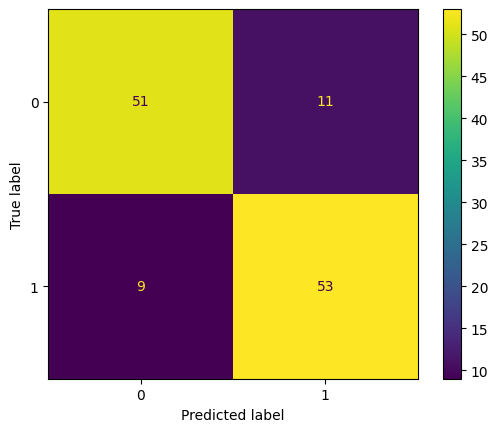

In [10]:
predictions = linear_classifier.predict(x_monk1_tr)

cm = confusion_matrix(y_monk1_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Polynomial kernel
For the SVM with an linear kernel, the hyperparameters we can work on are *C*, *gamma* and *degree*.

In [11]:
degree_range = np.arange(2, 10, 1)
C_range = np.logspace(-2, 10, 10, base = 2)
gamma_range = np.logspace(-9, 3, 10, base = 2)

param_grid = dict(
    degree = degree_range,
    C = C_range,
    gamma = gamma_range
)

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'poly'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    verbose = 4
)

grid.fit(x_monk1_tr, y_monk1_tr)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV 1/5] END C=0.25, degree=2, gamma=0.001953125;, score=0.711 total time=   0.0s
[CV 2/5] END C=0.25, degree=2, gamma=0.001953125;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.25, degree=2, gamma=0.001953125;, score=0.763 total time=   0.0s
[CV 4/5] END C=0.25, degree=2, gamma=0.001953125;, score=0.737 total time=   0.0s
[CV 5/5] END C=0.25, degree=2, gamma=0.001953125;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.25, degree=2, gamma=0.0049215666011518475;, score=0.711 total time=   0.0s
[CV 2/5] END C=0.25, degree=2, gamma=0.0049215666011518475;, score=0.711 total time=   0.0s
[CV 3/5] END C=0.25, degree=2, gamma=0.0049215666011518475;, score=0.763 total time=   0.0s
[CV 4/5] END C=0.25, degree=2, gamma=0.0049215666011518475;, score=0.737 total time=   0.0s
[CV 5/5] END C=0.25, degree=2, gamma=0.0049215666011518475;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.25, degree=2, gamma=0.012401570718501554;, score=

[CV 3/5] END C=0.25, degree=5, gamma=3.174802103936398;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.25, degree=5, gamma=3.174802103936398;, score=0.895 total time=   0.0s
[CV 5/5] END C=0.25, degree=5, gamma=3.174802103936398;, score=0.868 total time=   0.0s
[CV 1/5] END .......C=0.25, degree=5, gamma=8.0;, score=0.842 total time=   0.0s
[CV 2/5] END .......C=0.25, degree=5, gamma=8.0;, score=0.816 total time=   0.0s
[CV 3/5] END .......C=0.25, degree=5, gamma=8.0;, score=0.737 total time=   0.0s
[CV 4/5] END .......C=0.25, degree=5, gamma=8.0;, score=0.895 total time=   0.0s
[CV 5/5] END .......C=0.25, degree=5, gamma=8.0;, score=0.868 total time=   0.0s
[CV 1/5] END C=0.25, degree=6, gamma=0.001953125;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.25, degree=6, gamma=0.001953125;, score=0.737 total time=   0.0s
[CV 3/5] END C=0.25, degree=6, gamma=0.001953125;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.25, degree=6, gamma=0.001953125;, score=0.763 total time=   0.0s
[CV

[CV 5/5] END C=0.25, degree=7, gamma=3.174802103936398;, score=0.868 total time=   0.0s
[CV 1/5] END .......C=0.25, degree=7, gamma=8.0;, score=0.789 total time=   0.0s
[CV 2/5] END .......C=0.25, degree=7, gamma=8.0;, score=0.842 total time=   0.0s
[CV 3/5] END .......C=0.25, degree=7, gamma=8.0;, score=0.737 total time=   0.0s
[CV 4/5] END .......C=0.25, degree=7, gamma=8.0;, score=0.842 total time=   0.0s
[CV 5/5] END .......C=0.25, degree=7, gamma=8.0;, score=0.868 total time=   0.0s
[CV 1/5] END C=0.25, degree=8, gamma=0.001953125;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.25, degree=8, gamma=0.001953125;, score=0.789 total time=   0.0s
[CV 3/5] END C=0.25, degree=8, gamma=0.001953125;, score=0.816 total time=   0.0s
[CV 4/5] END C=0.25, degree=8, gamma=0.001953125;, score=0.816 total time=   0.0s
[CV 5/5] END C=0.25, degree=8, gamma=0.001953125;, score=0.842 total time=   0.0s
[CV 1/5] END C=0.25, degree=8, gamma=0.0049215666011518475;, score=0.789 total time=   0.0s
[CV 2

[CV 5/5] END C=0.25, degree=9, gamma=1.259921049894872;, score=0.895 total time=   0.0s
[CV 1/5] END C=0.25, degree=9, gamma=3.174802103936398;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.25, degree=9, gamma=3.174802103936398;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.25, degree=9, gamma=3.174802103936398;, score=0.763 total time=   0.0s
[CV 4/5] END C=0.25, degree=9, gamma=3.174802103936398;, score=0.842 total time=   0.0s
[CV 5/5] END C=0.25, degree=9, gamma=3.174802103936398;, score=0.895 total time=   0.0s
[CV 1/5] END .......C=0.25, degree=9, gamma=8.0;, score=0.763 total time=   0.0s
[CV 2/5] END .......C=0.25, degree=9, gamma=8.0;, score=0.816 total time=   0.0s
[CV 3/5] END .......C=0.25, degree=9, gamma=8.0;, score=0.763 total time=   0.0s
[CV 4/5] END .......C=0.25, degree=9, gamma=8.0;, score=0.842 total time=   0.0s
[CV 5/5] END .......C=0.25, degree=9, gamma=8.0;, score=0.895 total time=   0.0s
[CV 1/5] END C=0.6299605249474366, degree=2, gamma=0.001953125;, sc

[CV 5/5] END C=0.6299605249474366, degree=3, gamma=1.259921049894872;, score=1.000 total time=   0.0s
[CV 1/5] END C=0.6299605249474366, degree=3, gamma=3.174802103936398;, score=0.921 total time=   0.0s
[CV 2/5] END C=0.6299605249474366, degree=3, gamma=3.174802103936398;, score=0.921 total time=   0.0s
[CV 3/5] END C=0.6299605249474366, degree=3, gamma=3.174802103936398;, score=0.947 total time=   0.0s
[CV 4/5] END C=0.6299605249474366, degree=3, gamma=3.174802103936398;, score=0.921 total time=   0.0s
[CV 5/5] END C=0.6299605249474366, degree=3, gamma=3.174802103936398;, score=1.000 total time=   0.0s
[CV 1/5] END C=0.6299605249474366, degree=3, gamma=8.0;, score=0.921 total time=   0.0s
[CV 2/5] END C=0.6299605249474366, degree=3, gamma=8.0;, score=0.921 total time=   0.0s
[CV 3/5] END C=0.6299605249474366, degree=3, gamma=8.0;, score=0.947 total time=   0.0s
[CV 4/5] END C=0.6299605249474366, degree=3, gamma=8.0;, score=0.921 total time=   0.0s
[CV 5/5] END C=0.6299605249474366, d

[CV 3/5] END C=0.6299605249474366, degree=5, gamma=1.259921049894872;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.6299605249474366, degree=5, gamma=1.259921049894872;, score=0.895 total time=   0.0s
[CV 5/5] END C=0.6299605249474366, degree=5, gamma=1.259921049894872;, score=0.868 total time=   0.0s
[CV 1/5] END C=0.6299605249474366, degree=5, gamma=3.174802103936398;, score=0.842 total time=   0.0s
[CV 2/5] END C=0.6299605249474366, degree=5, gamma=3.174802103936398;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.6299605249474366, degree=5, gamma=3.174802103936398;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.6299605249474366, degree=5, gamma=3.174802103936398;, score=0.895 total time=   0.0s
[CV 5/5] END C=0.6299605249474366, degree=5, gamma=3.174802103936398;, score=0.868 total time=   0.0s
[CV 1/5] END C=0.6299605249474366, degree=5, gamma=8.0;, score=0.842 total time=   0.0s
[CV 2/5] END C=0.6299605249474366, degree=5, gamma=8.0;, score=0.816 total time=   0.0s
[CV 3/5]

[CV 3/5] END C=0.6299605249474366, degree=7, gamma=0.5;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.6299605249474366, degree=7, gamma=0.5;, score=0.842 total time=   0.0s
[CV 5/5] END C=0.6299605249474366, degree=7, gamma=0.5;, score=0.868 total time=   0.0s
[CV 1/5] END C=0.6299605249474366, degree=7, gamma=1.259921049894872;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.6299605249474366, degree=7, gamma=1.259921049894872;, score=0.842 total time=   0.0s
[CV 3/5] END C=0.6299605249474366, degree=7, gamma=1.259921049894872;, score=0.737 total time=   0.0s
[CV 4/5] END C=0.6299605249474366, degree=7, gamma=1.259921049894872;, score=0.842 total time=   0.0s
[CV 5/5] END C=0.6299605249474366, degree=7, gamma=1.259921049894872;, score=0.868 total time=   0.0s
[CV 1/5] END C=0.6299605249474366, degree=7, gamma=3.174802103936398;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.6299605249474366, degree=7, gamma=3.174802103936398;, score=0.842 total time=   0.0s
[CV 3/5] END C=0.62996

[CV 5/5] END C=0.6299605249474366, degree=9, gamma=1.259921049894872;, score=0.895 total time=   0.0s
[CV 1/5] END C=0.6299605249474366, degree=9, gamma=3.174802103936398;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.6299605249474366, degree=9, gamma=3.174802103936398;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.6299605249474366, degree=9, gamma=3.174802103936398;, score=0.763 total time=   0.0s
[CV 4/5] END C=0.6299605249474366, degree=9, gamma=3.174802103936398;, score=0.842 total time=   0.0s
[CV 5/5] END C=0.6299605249474366, degree=9, gamma=3.174802103936398;, score=0.895 total time=   0.0s
[CV 1/5] END C=0.6299605249474366, degree=9, gamma=8.0;, score=0.763 total time=   0.0s
[CV 2/5] END C=0.6299605249474366, degree=9, gamma=8.0;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.6299605249474366, degree=9, gamma=8.0;, score=0.763 total time=   0.0s
[CV 4/5] END C=0.6299605249474366, degree=9, gamma=8.0;, score=0.842 total time=   0.0s
[CV 5/5] END C=0.6299605249474366, d

[CV 1/5] END C=1.5874010519681994, degree=3, gamma=0.5;, score=0.921 total time=   0.0s
[CV 2/5] END C=1.5874010519681994, degree=3, gamma=0.5;, score=0.921 total time=   0.0s
[CV 3/5] END C=1.5874010519681994, degree=3, gamma=0.5;, score=0.947 total time=   0.0s
[CV 4/5] END C=1.5874010519681994, degree=3, gamma=0.5;, score=0.921 total time=   0.0s
[CV 5/5] END C=1.5874010519681994, degree=3, gamma=0.5;, score=1.000 total time=   0.0s
[CV 1/5] END C=1.5874010519681994, degree=3, gamma=1.259921049894872;, score=0.921 total time=   0.0s
[CV 2/5] END C=1.5874010519681994, degree=3, gamma=1.259921049894872;, score=0.921 total time=   0.0s
[CV 3/5] END C=1.5874010519681994, degree=3, gamma=1.259921049894872;, score=0.947 total time=   0.0s
[CV 4/5] END C=1.5874010519681994, degree=3, gamma=1.259921049894872;, score=0.921 total time=   0.0s
[CV 5/5] END C=1.5874010519681994, degree=3, gamma=1.259921049894872;, score=1.000 total time=   0.0s
[CV 1/5] END C=1.5874010519681994, degree=3, gamma

[CV 4/5] END C=1.5874010519681994, degree=5, gamma=1.259921049894872;, score=0.895 total time=   0.0s
[CV 5/5] END C=1.5874010519681994, degree=5, gamma=1.259921049894872;, score=0.868 total time=   0.0s
[CV 1/5] END C=1.5874010519681994, degree=5, gamma=3.174802103936398;, score=0.842 total time=   0.0s
[CV 2/5] END C=1.5874010519681994, degree=5, gamma=3.174802103936398;, score=0.816 total time=   0.0s
[CV 3/5] END C=1.5874010519681994, degree=5, gamma=3.174802103936398;, score=0.737 total time=   0.0s
[CV 4/5] END C=1.5874010519681994, degree=5, gamma=3.174802103936398;, score=0.895 total time=   0.0s
[CV 5/5] END C=1.5874010519681994, degree=5, gamma=3.174802103936398;, score=0.868 total time=   0.0s
[CV 1/5] END C=1.5874010519681994, degree=5, gamma=8.0;, score=0.842 total time=   0.0s
[CV 2/5] END C=1.5874010519681994, degree=5, gamma=8.0;, score=0.816 total time=   0.0s
[CV 3/5] END C=1.5874010519681994, degree=5, gamma=8.0;, score=0.737 total time=   0.0s
[CV 4/5] END C=1.58740

[CV 3/5] END C=1.5874010519681994, degree=8, gamma=0.001953125;, score=0.816 total time=   0.0s
[CV 4/5] END C=1.5874010519681994, degree=8, gamma=0.001953125;, score=0.737 total time=   0.0s
[CV 5/5] END C=1.5874010519681994, degree=8, gamma=0.001953125;, score=0.842 total time=   0.0s
[CV 1/5] END C=1.5874010519681994, degree=8, gamma=0.0049215666011518475;, score=0.789 total time=   0.0s
[CV 2/5] END C=1.5874010519681994, degree=8, gamma=0.0049215666011518475;, score=0.763 total time=   0.0s
[CV 3/5] END C=1.5874010519681994, degree=8, gamma=0.0049215666011518475;, score=0.816 total time=   0.0s
[CV 4/5] END C=1.5874010519681994, degree=8, gamma=0.0049215666011518475;, score=0.789 total time=   0.0s
[CV 5/5] END C=1.5874010519681994, degree=8, gamma=0.0049215666011518475;, score=0.842 total time=   0.0s
[CV 1/5] END C=1.5874010519681994, degree=8, gamma=0.012401570718501554;, score=0.789 total time=   0.0s
[CV 2/5] END C=1.5874010519681994, degree=8, gamma=0.012401570718501554;, sco

[CV 5/5] END C=4.0, degree=2, gamma=0.001953125;, score=0.789 total time=   0.0s
[CV 1/5] END C=4.0, degree=2, gamma=0.0049215666011518475;, score=0.711 total time=   0.0s
[CV 2/5] END C=4.0, degree=2, gamma=0.0049215666011518475;, score=0.711 total time=   0.0s
[CV 3/5] END C=4.0, degree=2, gamma=0.0049215666011518475;, score=0.763 total time=   0.0s
[CV 4/5] END C=4.0, degree=2, gamma=0.0049215666011518475;, score=0.737 total time=   0.0s
[CV 5/5] END C=4.0, degree=2, gamma=0.0049215666011518475;, score=0.789 total time=   0.0s
[CV 1/5] END C=4.0, degree=2, gamma=0.012401570718501554;, score=0.711 total time=   0.0s
[CV 2/5] END C=4.0, degree=2, gamma=0.012401570718501554;, score=0.711 total time=   0.0s
[CV 3/5] END C=4.0, degree=2, gamma=0.012401570718501554;, score=0.763 total time=   0.0s
[CV 4/5] END C=4.0, degree=2, gamma=0.012401570718501554;, score=0.737 total time=   0.0s
[CV 5/5] END C=4.0, degree=2, gamma=0.012401570718501554;, score=0.789 total time=   0.0s
[CV 1/5] END .

[CV 4/5] END C=4.0, degree=6, gamma=0.001953125;, score=0.763 total time=   0.0s
[CV 5/5] END C=4.0, degree=6, gamma=0.001953125;, score=0.868 total time=   0.0s
[CV 1/5] END C=4.0, degree=6, gamma=0.0049215666011518475;, score=0.789 total time=   0.0s
[CV 2/5] END C=4.0, degree=6, gamma=0.0049215666011518475;, score=0.737 total time=   0.0s
[CV 3/5] END C=4.0, degree=6, gamma=0.0049215666011518475;, score=0.816 total time=   0.0s
[CV 4/5] END C=4.0, degree=6, gamma=0.0049215666011518475;, score=0.763 total time=   0.0s
[CV 5/5] END C=4.0, degree=6, gamma=0.0049215666011518475;, score=0.868 total time=   0.0s
[CV 1/5] END C=4.0, degree=6, gamma=0.012401570718501554;, score=0.789 total time=   0.0s
[CV 2/5] END C=4.0, degree=6, gamma=0.012401570718501554;, score=0.737 total time=   0.0s
[CV 3/5] END C=4.0, degree=6, gamma=0.012401570718501554;, score=0.816 total time=   0.0s
[CV 4/5] END C=4.0, degree=6, gamma=0.012401570718501554;, score=0.763 total time=   0.0s
[CV 5/5] END C=4.0, deg

[CV 1/5] END C=4.0, degree=8, gamma=0.001953125;, score=0.789 total time=   0.0s
[CV 2/5] END C=4.0, degree=8, gamma=0.001953125;, score=0.789 total time=   0.0s
[CV 3/5] END C=4.0, degree=8, gamma=0.001953125;, score=0.816 total time=   0.0s
[CV 4/5] END C=4.0, degree=8, gamma=0.001953125;, score=0.789 total time=   0.0s
[CV 5/5] END C=4.0, degree=8, gamma=0.001953125;, score=0.842 total time=   0.0s
[CV 1/5] END C=4.0, degree=8, gamma=0.0049215666011518475;, score=0.789 total time=   0.0s
[CV 2/5] END C=4.0, degree=8, gamma=0.0049215666011518475;, score=0.763 total time=   0.0s
[CV 3/5] END C=4.0, degree=8, gamma=0.0049215666011518475;, score=0.816 total time=   0.0s
[CV 4/5] END C=4.0, degree=8, gamma=0.0049215666011518475;, score=0.789 total time=   0.0s
[CV 5/5] END C=4.0, degree=8, gamma=0.0049215666011518475;, score=0.842 total time=   0.0s
[CV 1/5] END C=4.0, degree=8, gamma=0.012401570718501554;, score=0.789 total time=   0.0s
[CV 2/5] END C=4.0, degree=8, gamma=0.012401570718

[CV 3/5] END ........C=4.0, degree=9, gamma=8.0;, score=0.763 total time=   0.0s
[CV 4/5] END ........C=4.0, degree=9, gamma=8.0;, score=0.842 total time=   0.0s
[CV 5/5] END ........C=4.0, degree=9, gamma=8.0;, score=0.895 total time=   0.0s
[CV 1/5] END C=10.079368399158984, degree=2, gamma=0.001953125;, score=0.711 total time=   0.0s
[CV 2/5] END C=10.079368399158984, degree=2, gamma=0.001953125;, score=0.711 total time=   0.0s
[CV 3/5] END C=10.079368399158984, degree=2, gamma=0.001953125;, score=0.763 total time=   0.0s
[CV 4/5] END C=10.079368399158984, degree=2, gamma=0.001953125;, score=0.737 total time=   0.0s
[CV 5/5] END C=10.079368399158984, degree=2, gamma=0.001953125;, score=0.789 total time=   0.0s
[CV 1/5] END C=10.079368399158984, degree=2, gamma=0.0049215666011518475;, score=0.711 total time=   0.0s
[CV 2/5] END C=10.079368399158984, degree=2, gamma=0.0049215666011518475;, score=0.711 total time=   0.0s
[CV 3/5] END C=10.079368399158984, degree=2, gamma=0.004921566601

[CV 1/5] END C=10.079368399158984, degree=3, gamma=1.259921049894872;, score=0.921 total time=   0.0s
[CV 2/5] END C=10.079368399158984, degree=3, gamma=1.259921049894872;, score=0.921 total time=   0.0s
[CV 3/5] END C=10.079368399158984, degree=3, gamma=1.259921049894872;, score=0.947 total time=   0.0s
[CV 4/5] END C=10.079368399158984, degree=3, gamma=1.259921049894872;, score=0.921 total time=   0.0s
[CV 5/5] END C=10.079368399158984, degree=3, gamma=1.259921049894872;, score=1.000 total time=   0.0s
[CV 1/5] END C=10.079368399158984, degree=3, gamma=3.174802103936398;, score=0.921 total time=   0.0s
[CV 2/5] END C=10.079368399158984, degree=3, gamma=3.174802103936398;, score=0.921 total time=   0.0s
[CV 3/5] END C=10.079368399158984, degree=3, gamma=3.174802103936398;, score=0.947 total time=   0.0s
[CV 4/5] END C=10.079368399158984, degree=3, gamma=3.174802103936398;, score=0.921 total time=   0.0s
[CV 5/5] END C=10.079368399158984, degree=3, gamma=3.174802103936398;, score=1.000

[CV 2/5] END C=10.079368399158984, degree=5, gamma=0.19842513149602486;, score=0.816 total time=   0.0s
[CV 3/5] END C=10.079368399158984, degree=5, gamma=0.19842513149602486;, score=0.737 total time=   0.0s
[CV 4/5] END C=10.079368399158984, degree=5, gamma=0.19842513149602486;, score=0.895 total time=   0.0s
[CV 5/5] END C=10.079368399158984, degree=5, gamma=0.19842513149602486;, score=0.868 total time=   0.0s
[CV 1/5] END C=10.079368399158984, degree=5, gamma=0.5;, score=0.842 total time=   0.0s
[CV 2/5] END C=10.079368399158984, degree=5, gamma=0.5;, score=0.816 total time=   0.0s
[CV 3/5] END C=10.079368399158984, degree=5, gamma=0.5;, score=0.737 total time=   0.0s
[CV 4/5] END C=10.079368399158984, degree=5, gamma=0.5;, score=0.895 total time=   0.0s
[CV 5/5] END C=10.079368399158984, degree=5, gamma=0.5;, score=0.868 total time=   0.0s
[CV 1/5] END C=10.079368399158984, degree=5, gamma=1.259921049894872;, score=0.842 total time=   0.0s
[CV 2/5] END C=10.079368399158984, degree=

[CV 4/5] END C=10.079368399158984, degree=7, gamma=0.19842513149602486;, score=0.842 total time=   0.0s
[CV 5/5] END C=10.079368399158984, degree=7, gamma=0.19842513149602486;, score=0.868 total time=   0.0s
[CV 1/5] END C=10.079368399158984, degree=7, gamma=0.5;, score=0.789 total time=   0.0s
[CV 2/5] END C=10.079368399158984, degree=7, gamma=0.5;, score=0.842 total time=   0.0s
[CV 3/5] END C=10.079368399158984, degree=7, gamma=0.5;, score=0.737 total time=   0.0s
[CV 4/5] END C=10.079368399158984, degree=7, gamma=0.5;, score=0.842 total time=   0.0s
[CV 5/5] END C=10.079368399158984, degree=7, gamma=0.5;, score=0.868 total time=   0.0s
[CV 1/5] END C=10.079368399158984, degree=7, gamma=1.259921049894872;, score=0.789 total time=   0.0s
[CV 2/5] END C=10.079368399158984, degree=7, gamma=1.259921049894872;, score=0.842 total time=   0.0s
[CV 3/5] END C=10.079368399158984, degree=7, gamma=1.259921049894872;, score=0.737 total time=   0.0s
[CV 4/5] END C=10.079368399158984, degree=7, g

[CV 1/5] END C=10.079368399158984, degree=9, gamma=0.07874506561842956;, score=0.789 total time=   0.0s
[CV 2/5] END C=10.079368399158984, degree=9, gamma=0.07874506561842956;, score=0.763 total time=   0.0s
[CV 3/5] END C=10.079368399158984, degree=9, gamma=0.07874506561842956;, score=0.816 total time=   0.0s
[CV 4/5] END C=10.079368399158984, degree=9, gamma=0.07874506561842956;, score=0.763 total time=   0.0s
[CV 5/5] END C=10.079368399158984, degree=9, gamma=0.07874506561842956;, score=0.842 total time=   0.0s
[CV 1/5] END C=10.079368399158984, degree=9, gamma=0.19842513149602486;, score=0.763 total time=   0.0s
[CV 2/5] END C=10.079368399158984, degree=9, gamma=0.19842513149602486;, score=0.816 total time=   0.0s
[CV 3/5] END C=10.079368399158984, degree=9, gamma=0.19842513149602486;, score=0.763 total time=   0.0s
[CV 4/5] END C=10.079368399158984, degree=9, gamma=0.19842513149602486;, score=0.842 total time=   0.0s
[CV 5/5] END C=10.079368399158984, degree=9, gamma=0.19842513149

[CV 1/5] END C=25.398416831491183, degree=3, gamma=0.0049215666011518475;, score=0.763 total time=   0.0s
[CV 2/5] END C=25.398416831491183, degree=3, gamma=0.0049215666011518475;, score=0.684 total time=   0.0s
[CV 3/5] END C=25.398416831491183, degree=3, gamma=0.0049215666011518475;, score=0.816 total time=   0.0s
[CV 4/5] END C=25.398416831491183, degree=3, gamma=0.0049215666011518475;, score=0.737 total time=   0.0s
[CV 5/5] END C=25.398416831491183, degree=3, gamma=0.0049215666011518475;, score=0.789 total time=   0.0s
[CV 1/5] END C=25.398416831491183, degree=3, gamma=0.012401570718501554;, score=0.763 total time=   0.0s
[CV 2/5] END C=25.398416831491183, degree=3, gamma=0.012401570718501554;, score=0.684 total time=   0.0s
[CV 3/5] END C=25.398416831491183, degree=3, gamma=0.012401570718501554;, score=0.816 total time=   0.0s
[CV 4/5] END C=25.398416831491183, degree=3, gamma=0.012401570718501554;, score=0.737 total time=   0.0s
[CV 5/5] END C=25.398416831491183, degree=3, gamma

[CV 3/5] END C=25.398416831491183, degree=5, gamma=0.001953125;, score=0.816 total time=   0.0s
[CV 4/5] END C=25.398416831491183, degree=5, gamma=0.001953125;, score=0.763 total time=   0.0s
[CV 5/5] END C=25.398416831491183, degree=5, gamma=0.001953125;, score=0.868 total time=   0.0s
[CV 1/5] END C=25.398416831491183, degree=5, gamma=0.0049215666011518475;, score=0.763 total time=   0.0s
[CV 2/5] END C=25.398416831491183, degree=5, gamma=0.0049215666011518475;, score=0.711 total time=   0.0s
[CV 3/5] END C=25.398416831491183, degree=5, gamma=0.0049215666011518475;, score=0.816 total time=   0.0s
[CV 4/5] END C=25.398416831491183, degree=5, gamma=0.0049215666011518475;, score=0.763 total time=   0.0s
[CV 5/5] END C=25.398416831491183, degree=5, gamma=0.0049215666011518475;, score=0.868 total time=   0.0s
[CV 1/5] END C=25.398416831491183, degree=5, gamma=0.012401570718501554;, score=0.763 total time=   0.0s
[CV 2/5] END C=25.398416831491183, degree=5, gamma=0.012401570718501554;, sco

[CV 3/5] END C=25.398416831491183, degree=7, gamma=0.0049215666011518475;, score=0.816 total time=   0.0s
[CV 4/5] END C=25.398416831491183, degree=7, gamma=0.0049215666011518475;, score=0.789 total time=   0.0s
[CV 5/5] END C=25.398416831491183, degree=7, gamma=0.0049215666011518475;, score=0.842 total time=   0.0s
[CV 1/5] END C=25.398416831491183, degree=7, gamma=0.012401570718501554;, score=0.789 total time=   0.0s
[CV 2/5] END C=25.398416831491183, degree=7, gamma=0.012401570718501554;, score=0.737 total time=   0.0s
[CV 3/5] END C=25.398416831491183, degree=7, gamma=0.012401570718501554;, score=0.816 total time=   0.0s
[CV 4/5] END C=25.398416831491183, degree=7, gamma=0.012401570718501554;, score=0.789 total time=   0.0s
[CV 5/5] END C=25.398416831491183, degree=7, gamma=0.012401570718501554;, score=0.842 total time=   0.0s
[CV 1/5] END C=25.398416831491183, degree=7, gamma=0.03125;, score=0.789 total time=   0.0s
[CV 2/5] END C=25.398416831491183, degree=7, gamma=0.03125;, scor

[CV 3/5] END C=25.398416831491183, degree=9, gamma=0.07874506561842956;, score=0.816 total time=   0.0s
[CV 4/5] END C=25.398416831491183, degree=9, gamma=0.07874506561842956;, score=0.763 total time=   0.0s
[CV 5/5] END C=25.398416831491183, degree=9, gamma=0.07874506561842956;, score=0.842 total time=   0.0s
[CV 1/5] END C=25.398416831491183, degree=9, gamma=0.19842513149602486;, score=0.763 total time=   0.0s
[CV 2/5] END C=25.398416831491183, degree=9, gamma=0.19842513149602486;, score=0.816 total time=   0.0s
[CV 3/5] END C=25.398416831491183, degree=9, gamma=0.19842513149602486;, score=0.763 total time=   0.0s
[CV 4/5] END C=25.398416831491183, degree=9, gamma=0.19842513149602486;, score=0.842 total time=   0.0s
[CV 5/5] END C=25.398416831491183, degree=9, gamma=0.19842513149602486;, score=0.895 total time=   0.0s
[CV 1/5] END C=25.398416831491183, degree=9, gamma=0.5;, score=0.763 total time=   0.0s
[CV 2/5] END C=25.398416831491183, degree=9, gamma=0.5;, score=0.816 total time=

[CV 4/5] END ...C=64.0, degree=3, gamma=0.03125;, score=0.789 total time=   0.0s
[CV 5/5] END ...C=64.0, degree=3, gamma=0.03125;, score=0.842 total time=   0.0s
[CV 1/5] END C=64.0, degree=3, gamma=0.07874506561842956;, score=0.921 total time=   0.0s
[CV 2/5] END C=64.0, degree=3, gamma=0.07874506561842956;, score=0.921 total time=   0.0s
[CV 3/5] END C=64.0, degree=3, gamma=0.07874506561842956;, score=0.947 total time=   0.0s
[CV 4/5] END C=64.0, degree=3, gamma=0.07874506561842956;, score=0.921 total time=   0.0s
[CV 5/5] END C=64.0, degree=3, gamma=0.07874506561842956;, score=1.000 total time=   0.0s
[CV 1/5] END C=64.0, degree=3, gamma=0.19842513149602486;, score=0.921 total time=   0.0s
[CV 2/5] END C=64.0, degree=3, gamma=0.19842513149602486;, score=0.921 total time=   0.0s
[CV 3/5] END C=64.0, degree=3, gamma=0.19842513149602486;, score=0.947 total time=   0.0s
[CV 4/5] END C=64.0, degree=3, gamma=0.19842513149602486;, score=0.921 total time=   0.0s
[CV 5/5] END C=64.0, degree=

[CV 3/5] END C=64.0, degree=5, gamma=0.19842513149602486;, score=0.737 total time=   0.0s
[CV 4/5] END C=64.0, degree=5, gamma=0.19842513149602486;, score=0.895 total time=   0.0s
[CV 5/5] END C=64.0, degree=5, gamma=0.19842513149602486;, score=0.868 total time=   0.0s
[CV 1/5] END .......C=64.0, degree=5, gamma=0.5;, score=0.842 total time=   0.0s
[CV 2/5] END .......C=64.0, degree=5, gamma=0.5;, score=0.816 total time=   0.0s
[CV 3/5] END .......C=64.0, degree=5, gamma=0.5;, score=0.737 total time=   0.0s
[CV 4/5] END .......C=64.0, degree=5, gamma=0.5;, score=0.895 total time=   0.0s
[CV 5/5] END .......C=64.0, degree=5, gamma=0.5;, score=0.868 total time=   0.0s
[CV 1/5] END C=64.0, degree=5, gamma=1.259921049894872;, score=0.842 total time=   0.0s
[CV 2/5] END C=64.0, degree=5, gamma=1.259921049894872;, score=0.816 total time=   0.0s
[CV 3/5] END C=64.0, degree=5, gamma=1.259921049894872;, score=0.737 total time=   0.0s
[CV 4/5] END C=64.0, degree=5, gamma=1.259921049894872;, scor

[CV 5/5] END .......C=64.0, degree=7, gamma=0.5;, score=0.868 total time=   0.0s
[CV 1/5] END C=64.0, degree=7, gamma=1.259921049894872;, score=0.789 total time=   0.0s
[CV 2/5] END C=64.0, degree=7, gamma=1.259921049894872;, score=0.842 total time=   0.0s
[CV 3/5] END C=64.0, degree=7, gamma=1.259921049894872;, score=0.737 total time=   0.0s
[CV 4/5] END C=64.0, degree=7, gamma=1.259921049894872;, score=0.842 total time=   0.0s
[CV 5/5] END C=64.0, degree=7, gamma=1.259921049894872;, score=0.868 total time=   0.0s
[CV 1/5] END C=64.0, degree=7, gamma=3.174802103936398;, score=0.789 total time=   0.0s
[CV 2/5] END C=64.0, degree=7, gamma=3.174802103936398;, score=0.842 total time=   0.0s
[CV 3/5] END C=64.0, degree=7, gamma=3.174802103936398;, score=0.737 total time=   0.0s
[CV 4/5] END C=64.0, degree=7, gamma=3.174802103936398;, score=0.842 total time=   0.0s
[CV 5/5] END C=64.0, degree=7, gamma=3.174802103936398;, score=0.868 total time=   0.0s
[CV 1/5] END .......C=64.0, degree=7, g

[CV 5/5] END C=161.26989438654363, degree=2, gamma=1.259921049894872;, score=1.000 total time=   0.0s
[CV 1/5] END C=161.26989438654363, degree=2, gamma=3.174802103936398;, score=1.000 total time=   0.0s
[CV 2/5] END C=161.26989438654363, degree=2, gamma=3.174802103936398;, score=0.974 total time=   0.0s
[CV 3/5] END C=161.26989438654363, degree=2, gamma=3.174802103936398;, score=1.000 total time=   0.0s
[CV 4/5] END C=161.26989438654363, degree=2, gamma=3.174802103936398;, score=1.000 total time=   0.0s
[CV 5/5] END C=161.26989438654363, degree=2, gamma=3.174802103936398;, score=1.000 total time=   0.0s
[CV 1/5] END C=161.26989438654363, degree=2, gamma=8.0;, score=1.000 total time=   0.0s
[CV 2/5] END C=161.26989438654363, degree=2, gamma=8.0;, score=0.974 total time=   0.0s
[CV 3/5] END C=161.26989438654363, degree=2, gamma=8.0;, score=1.000 total time=   0.0s
[CV 4/5] END C=161.26989438654363, degree=2, gamma=8.0;, score=1.000 total time=   0.0s
[CV 5/5] END C=161.26989438654363, d

[CV 5/5] END C=161.26989438654363, degree=4, gamma=0.5;, score=0.921 total time=   0.0s
[CV 1/5] END C=161.26989438654363, degree=4, gamma=1.259921049894872;, score=0.895 total time=   0.0s
[CV 2/5] END C=161.26989438654363, degree=4, gamma=1.259921049894872;, score=0.868 total time=   0.0s
[CV 3/5] END C=161.26989438654363, degree=4, gamma=1.259921049894872;, score=0.789 total time=   0.0s
[CV 4/5] END C=161.26989438654363, degree=4, gamma=1.259921049894872;, score=0.868 total time=   0.0s
[CV 5/5] END C=161.26989438654363, degree=4, gamma=1.259921049894872;, score=0.921 total time=   0.0s
[CV 1/5] END C=161.26989438654363, degree=4, gamma=3.174802103936398;, score=0.895 total time=   0.0s
[CV 2/5] END C=161.26989438654363, degree=4, gamma=3.174802103936398;, score=0.868 total time=   0.0s
[CV 3/5] END C=161.26989438654363, degree=4, gamma=3.174802103936398;, score=0.789 total time=   0.0s
[CV 4/5] END C=161.26989438654363, degree=4, gamma=3.174802103936398;, score=0.868 total time=  

[CV 5/5] END C=161.26989438654363, degree=6, gamma=0.19842513149602486;, score=0.868 total time=   0.0s
[CV 1/5] END C=161.26989438654363, degree=6, gamma=0.5;, score=0.816 total time=   0.0s
[CV 2/5] END C=161.26989438654363, degree=6, gamma=0.5;, score=0.816 total time=   0.0s
[CV 3/5] END C=161.26989438654363, degree=6, gamma=0.5;, score=0.737 total time=   0.0s
[CV 4/5] END C=161.26989438654363, degree=6, gamma=0.5;, score=0.895 total time=   0.0s
[CV 5/5] END C=161.26989438654363, degree=6, gamma=0.5;, score=0.868 total time=   0.0s
[CV 1/5] END C=161.26989438654363, degree=6, gamma=1.259921049894872;, score=0.816 total time=   0.0s
[CV 2/5] END C=161.26989438654363, degree=6, gamma=1.259921049894872;, score=0.816 total time=   0.0s
[CV 3/5] END C=161.26989438654363, degree=6, gamma=1.259921049894872;, score=0.737 total time=   0.0s
[CV 4/5] END C=161.26989438654363, degree=6, gamma=1.259921049894872;, score=0.895 total time=   0.0s
[CV 5/5] END C=161.26989438654363, degree=6, gam

[CV 4/5] END C=161.26989438654363, degree=8, gamma=0.03125;, score=0.789 total time=   0.0s
[CV 5/5] END C=161.26989438654363, degree=8, gamma=0.03125;, score=0.842 total time=   0.0s
[CV 1/5] END C=161.26989438654363, degree=8, gamma=0.07874506561842956;, score=0.789 total time=   0.0s
[CV 2/5] END C=161.26989438654363, degree=8, gamma=0.07874506561842956;, score=0.763 total time=   0.0s
[CV 3/5] END C=161.26989438654363, degree=8, gamma=0.07874506561842956;, score=0.816 total time=   0.0s
[CV 4/5] END C=161.26989438654363, degree=8, gamma=0.07874506561842956;, score=0.789 total time=   0.0s
[CV 5/5] END C=161.26989438654363, degree=8, gamma=0.07874506561842956;, score=0.842 total time=   0.0s
[CV 1/5] END C=161.26989438654363, degree=8, gamma=0.19842513149602486;, score=0.763 total time=   0.0s
[CV 2/5] END C=161.26989438654363, degree=8, gamma=0.19842513149602486;, score=0.816 total time=   0.0s
[CV 3/5] END C=161.26989438654363, degree=8, gamma=0.19842513149602486;, score=0.763 tot

[CV 2/5] END C=406.3746693038589, degree=3, gamma=0.19842513149602486;, score=0.921 total time=   0.0s
[CV 3/5] END C=406.3746693038589, degree=3, gamma=0.19842513149602486;, score=0.947 total time=   0.0s
[CV 4/5] END C=406.3746693038589, degree=3, gamma=0.19842513149602486;, score=0.921 total time=   0.0s
[CV 5/5] END C=406.3746693038589, degree=3, gamma=0.19842513149602486;, score=1.000 total time=   0.0s
[CV 1/5] END C=406.3746693038589, degree=3, gamma=0.5;, score=0.921 total time=   0.0s
[CV 2/5] END C=406.3746693038589, degree=3, gamma=0.5;, score=0.921 total time=   0.0s
[CV 3/5] END C=406.3746693038589, degree=3, gamma=0.5;, score=0.947 total time=   0.0s
[CV 4/5] END C=406.3746693038589, degree=3, gamma=0.5;, score=0.921 total time=   0.0s
[CV 5/5] END C=406.3746693038589, degree=3, gamma=0.5;, score=1.000 total time=   0.0s
[CV 1/5] END C=406.3746693038589, degree=3, gamma=1.259921049894872;, score=0.921 total time=   0.0s
[CV 2/5] END C=406.3746693038589, degree=3, gamma=1.

[CV 5/5] END C=406.3746693038589, degree=5, gamma=0.012401570718501554;, score=0.868 total time=   0.0s
[CV 1/5] END C=406.3746693038589, degree=5, gamma=0.03125;, score=0.763 total time=   0.0s
[CV 2/5] END C=406.3746693038589, degree=5, gamma=0.03125;, score=0.711 total time=   0.0s
[CV 3/5] END C=406.3746693038589, degree=5, gamma=0.03125;, score=0.816 total time=   0.0s
[CV 4/5] END C=406.3746693038589, degree=5, gamma=0.03125;, score=0.763 total time=   0.0s
[CV 5/5] END C=406.3746693038589, degree=5, gamma=0.03125;, score=0.868 total time=   0.0s
[CV 1/5] END C=406.3746693038589, degree=5, gamma=0.07874506561842956;, score=0.842 total time=   0.0s
[CV 2/5] END C=406.3746693038589, degree=5, gamma=0.07874506561842956;, score=0.816 total time=   0.0s
[CV 3/5] END C=406.3746693038589, degree=5, gamma=0.07874506561842956;, score=0.737 total time=   0.0s
[CV 4/5] END C=406.3746693038589, degree=5, gamma=0.07874506561842956;, score=0.895 total time=   0.0s
[CV 5/5] END C=406.3746693038

[CV 4/5] END C=406.3746693038589, degree=9, gamma=0.001953125;, score=0.789 total time=   0.0s
[CV 5/5] END C=406.3746693038589, degree=9, gamma=0.001953125;, score=0.842 total time=   0.0s
[CV 1/5] END C=406.3746693038589, degree=9, gamma=0.0049215666011518475;, score=0.789 total time=   0.0s
[CV 2/5] END C=406.3746693038589, degree=9, gamma=0.0049215666011518475;, score=0.763 total time=   0.0s
[CV 3/5] END C=406.3746693038589, degree=9, gamma=0.0049215666011518475;, score=0.816 total time=   0.0s
[CV 4/5] END C=406.3746693038589, degree=9, gamma=0.0049215666011518475;, score=0.763 total time=   0.0s
[CV 5/5] END C=406.3746693038589, degree=9, gamma=0.0049215666011518475;, score=0.842 total time=   0.0s
[CV 1/5] END C=406.3746693038589, degree=9, gamma=0.012401570718501554;, score=0.789 total time=   0.0s
[CV 2/5] END C=406.3746693038589, degree=9, gamma=0.012401570718501554;, score=0.763 total time=   0.0s
[CV 3/5] END C=406.3746693038589, degree=9, gamma=0.012401570718501554;, scor

[CV 4/5] END .....C=1024.0, degree=2, gamma=8.0;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=1024.0, degree=2, gamma=8.0;, score=1.000 total time=   0.0s
[CV 1/5] END C=1024.0, degree=3, gamma=0.001953125;, score=0.763 total time=   0.0s
[CV 2/5] END C=1024.0, degree=3, gamma=0.001953125;, score=0.684 total time=   0.0s
[CV 3/5] END C=1024.0, degree=3, gamma=0.001953125;, score=0.816 total time=   0.0s
[CV 4/5] END C=1024.0, degree=3, gamma=0.001953125;, score=0.737 total time=   0.0s
[CV 5/5] END C=1024.0, degree=3, gamma=0.001953125;, score=0.789 total time=   0.0s
[CV 1/5] END C=1024.0, degree=3, gamma=0.0049215666011518475;, score=0.763 total time=   0.0s
[CV 2/5] END C=1024.0, degree=3, gamma=0.0049215666011518475;, score=0.684 total time=   0.0s
[CV 3/5] END C=1024.0, degree=3, gamma=0.0049215666011518475;, score=0.816 total time=   0.0s
[CV 4/5] END C=1024.0, degree=3, gamma=0.0049215666011518475;, score=0.737 total time=   0.0s
[CV 5/5] END C=1024.0, degree=3, gamma=0.0

[CV 3/5] END C=1024.0, degree=5, gamma=0.012401570718501554;, score=0.816 total time=   0.0s
[CV 4/5] END C=1024.0, degree=5, gamma=0.012401570718501554;, score=0.763 total time=   0.0s
[CV 5/5] END C=1024.0, degree=5, gamma=0.012401570718501554;, score=0.868 total time=   0.0s
[CV 1/5] END .C=1024.0, degree=5, gamma=0.03125;, score=0.763 total time=   0.0s
[CV 2/5] END .C=1024.0, degree=5, gamma=0.03125;, score=0.711 total time=   0.0s
[CV 3/5] END .C=1024.0, degree=5, gamma=0.03125;, score=0.816 total time=   0.0s
[CV 4/5] END .C=1024.0, degree=5, gamma=0.03125;, score=0.763 total time=   0.0s
[CV 5/5] END .C=1024.0, degree=5, gamma=0.03125;, score=0.868 total time=   0.0s
[CV 1/5] END C=1024.0, degree=5, gamma=0.07874506561842956;, score=0.842 total time=   0.0s
[CV 2/5] END C=1024.0, degree=5, gamma=0.07874506561842956;, score=0.816 total time=   0.0s
[CV 3/5] END C=1024.0, degree=5, gamma=0.07874506561842956;, score=0.737 total time=   0.0s
[CV 4/5] END C=1024.0, degree=5, gamma=0

[CV 2/5] END .....C=1024.0, degree=7, gamma=0.5;, score=0.842 total time=   0.0s
[CV 3/5] END .....C=1024.0, degree=7, gamma=0.5;, score=0.737 total time=   0.0s
[CV 4/5] END .....C=1024.0, degree=7, gamma=0.5;, score=0.842 total time=   0.0s
[CV 5/5] END .....C=1024.0, degree=7, gamma=0.5;, score=0.868 total time=   0.0s
[CV 1/5] END C=1024.0, degree=7, gamma=1.259921049894872;, score=0.789 total time=   0.0s
[CV 2/5] END C=1024.0, degree=7, gamma=1.259921049894872;, score=0.842 total time=   0.0s
[CV 3/5] END C=1024.0, degree=7, gamma=1.259921049894872;, score=0.737 total time=   0.0s
[CV 4/5] END C=1024.0, degree=7, gamma=1.259921049894872;, score=0.842 total time=   0.0s
[CV 5/5] END C=1024.0, degree=7, gamma=1.259921049894872;, score=0.868 total time=   0.0s
[CV 1/5] END C=1024.0, degree=7, gamma=3.174802103936398;, score=0.789 total time=   0.0s
[CV 2/5] END C=1024.0, degree=7, gamma=3.174802103936398;, score=0.842 total time=   0.0s
[CV 3/5] END C=1024.0, degree=7, gamma=3.17480

[CV 3/5] END C=1024.0, degree=9, gamma=1.259921049894872;, score=0.763 total time=   0.0s
[CV 4/5] END C=1024.0, degree=9, gamma=1.259921049894872;, score=0.842 total time=   0.0s
[CV 5/5] END C=1024.0, degree=9, gamma=1.259921049894872;, score=0.895 total time=   0.0s
[CV 1/5] END C=1024.0, degree=9, gamma=3.174802103936398;, score=0.763 total time=   0.0s
[CV 2/5] END C=1024.0, degree=9, gamma=3.174802103936398;, score=0.816 total time=   0.0s
[CV 3/5] END C=1024.0, degree=9, gamma=3.174802103936398;, score=0.763 total time=   0.0s
[CV 4/5] END C=1024.0, degree=9, gamma=3.174802103936398;, score=0.842 total time=   0.0s
[CV 5/5] END C=1024.0, degree=9, gamma=3.174802103936398;, score=0.895 total time=   0.0s
[CV 1/5] END .....C=1024.0, degree=9, gamma=8.0;, score=0.763 total time=   0.0s
[CV 2/5] END .....C=1024.0, degree=9, gamma=8.0;, score=0.816 total time=   0.0s
[CV 3/5] END .....C=1024.0, degree=9, gamma=8.0;, score=0.763 total time=   0.0s
[CV 4/5] END .....C=1024.0, degree=9,

In [12]:
poly_classifier = SVC(
    C = grid.best_params_['C'],
    gamma = grid.best_params_['gamma'],
    degree = grid.best_params_['degree'],
    kernel = 'poly'
)
poly_classifier.fit(x_monk1_tr, y_monk1_tr)

SVC(C=0.25, degree=2, gamma=1.259921049894872, kernel='poly')

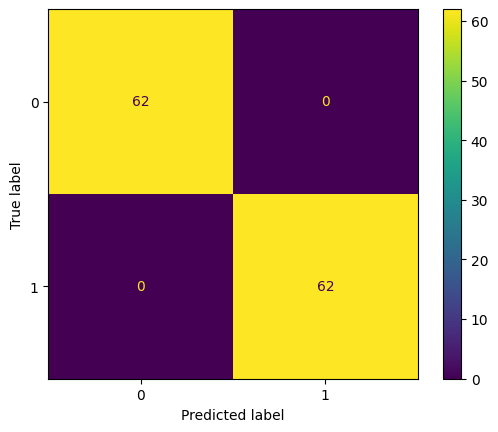

In [13]:
predictions = poly_classifier.predict(x_monk1_tr)

cm = confusion_matrix(y_monk1_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Model selection
After the model selection of SVC with different kind of kernels, we are going to select the best one.
Since a high C means that the model has a higer complexity (because of the SLT) and the risk is higher, we prefer to choose the SVM that uses polynomial as kernel, since C is low (and it means we have a low complexity due to the regularization). 

In [17]:
#Save the polynomial model
joblib.dump(poly_classifier, './results/monk1/SVM/poly_svm_monk1.z')

['./results/monk1/SVM/poly_svm_monk1.z']

### Model assestment
After we have chosen the best model, we evaluate it using the test set and checking if the accuracy is satisfactory.

In [18]:
svm_monk1 = joblib.load('./results/monk1/SVM/poly_svm_monk1.z')

In [19]:
score1 = svm_monk1.score(x_monk1_ts, y_monk1_ts)

In [20]:
print("Final accuracy on the test set: " + str(score1))

Final accuracy on the test set: 1.0


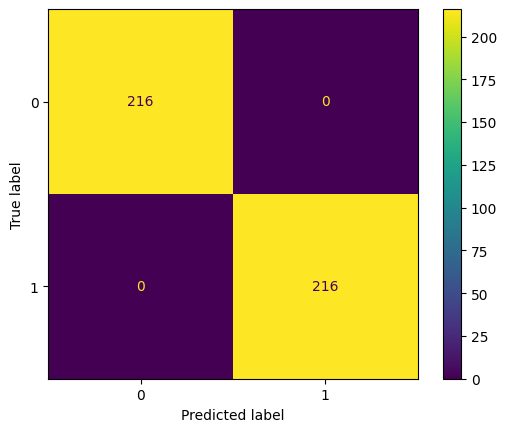

In [21]:
predictions = svm_monk1.predict(x_monk1_ts)

cm = confusion_matrix(y_monk1_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Monk 2

In [22]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk2_tr = pd.read_csv("./dataset/monk2/monks-2.train", sep = " ", skipinitialspace=True, names = colnames)
monk2_tr = monk2_tr.drop('id', axis = 1)

monk2_ts = pd.read_csv("./dataset/monk2/monks-2.test", sep = " ", skipinitialspace=True, names = colnames)
monk2_ts = monk2_ts.drop('id', axis = 1)

In [23]:
x_monk2_tr = monk2_tr.iloc[:, 1:7].values
y_monk2_tr = monk2_tr.iloc[:, 0].values

x_monk2_ts = monk2_ts.iloc[:, 1:7].values
y_monk2_ts = monk2_ts.iloc[:, 0].values

In [24]:
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk2_tr)
x_monk2_tr = one_hot_encoder_tr.transform(x_monk2_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk2_ts)
x_monk2_ts = one_hot_encoder_ts.transform(x_monk2_ts)

### Grid search

#### RBF kernel
For the SVM with an RBF kernel, the hyperparameters we can work on are *C* and *gamma*.

In [25]:
C_range = np.logspace(-2, 10, 50, base = 2)
gamma_range = np.logspace(-9, 10, 50, base = 2)

param_grid = dict(
    gamma = gamma_range,
    C = C_range
)

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'rbf'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    verbose = 4
)

grid.fit(x_monk2_tr, y_monk2_tr)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits
[CV 1/5] END .........C=0.25, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 2/5] END .........C=0.25, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 3/5] END .........C=0.25, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 4/5] END .........C=0.25, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 5/5] END .........C=0.25, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.25, gamma=0.002555382731929735;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.25, gamma=0.002555382731929735;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.25, gamma=0.002555382731929735;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.25, gamma=0.002555382731929735;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.25, gamma=0.002555382731929735;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.25, gamma=0.003343350224202069;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.25, gamma=0.00334335022420

[CV 1/5] END ...C=0.25, gamma=0.552044756836906;, score=0.627 total time=   0.0s
[CV 2/5] END ...C=0.25, gamma=0.552044756836906;, score=0.627 total time=   0.0s
[CV 3/5] END ...C=0.25, gamma=0.552044756836906;, score=0.627 total time=   0.0s
[CV 4/5] END ...C=0.25, gamma=0.552044756836906;, score=0.627 total time=   0.0s
[CV 5/5] END ...C=0.25, gamma=0.552044756836906;, score=0.627 total time=   0.0s
[CV 1/5] END ..C=0.25, gamma=0.7222710471031699;, score=0.627 total time=   0.0s
[CV 2/5] END ..C=0.25, gamma=0.7222710471031699;, score=0.627 total time=   0.0s
[CV 3/5] END ..C=0.25, gamma=0.7222710471031699;, score=0.627 total time=   0.0s
[CV 4/5] END ..C=0.25, gamma=0.7222710471031699;, score=0.627 total time=   0.0s
[CV 5/5] END ..C=0.25, gamma=0.7222710471031699;, score=0.627 total time=   0.0s
[CV 1/5] END ...C=0.25, gamma=0.944987628308606;, score=0.627 total time=   0.0s
[CV 2/5] END ...C=0.25, gamma=0.944987628308606;, score=0.627 total time=   0.0s
[CV 3/5] END ...C=0.25, gamm

[CV 2/5] END ...C=0.25, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 3/5] END ...C=0.25, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 4/5] END ...C=0.25, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 5/5] END ...C=0.25, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 1/5] END ....C=0.25, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 2/5] END ....C=0.25, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 3/5] END ....C=0.25, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 4/5] END ....C=0.25, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 5/5] END ....C=0.25, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 1/5] END ...C=0.25, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 2/5] END ...C=0.25, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 3/5] END ...C=0.25, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 4/5] END ...C=0.25, gamm

[CV 2/5] END C=0.29625223827969416, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.29625223827969416, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.29625223827969416, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.29625223827969416, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.29625223827969416, gamma=0.14399410274531188;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.29625223827969416, gamma=0.14399410274531188;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.29625223827969416, gamma=0.14399410274531188;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.29625223827969416, gamma=0.14399410274531188;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.29625223827969416, gamma=0.14399410274531188;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.29625223827969416, gamma=0.1883955423514039;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.29625223827969416, gamma=0.1883955

[CV 5/5] END C=0.29625223827969416, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.29625223827969416, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.29625223827969416, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.29625223827969416, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.29625223827969416, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.29625223827969416, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.29625223827969416, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.29625223827969416, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.29625223827969416, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.29625223827969416, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.29625223827969416, gamma=23.77590862619117;, score=0

[CV 1/5] END C=0.3510615547429147, gamma=0.021941347171432164;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.3510615547429147, gamma=0.021941347171432164;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.3510615547429147, gamma=0.021941347171432164;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.3510615547429147, gamma=0.021941347171432164;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.3510615547429147, gamma=0.021941347171432164;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.3510615547429147, gamma=0.028707092314702358;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.3510615547429147, gamma=0.028707092314702358;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.3510615547429147, gamma=0.028707092314702358;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.3510615547429147, gamma=0.028707092314702358;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.3510615547429147, gamma=0.028707092314702358;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.3510615547429147, gamma=0.0375590

[CV 4/5] END C=0.3510615547429147, gamma=2.7690435716916086;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.3510615547429147, gamma=2.7690435716916086;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.3510615547429147, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.3510615547429147, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.3510615547429147, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.3510615547429147, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.3510615547429147, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.3510615547429147, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.3510615547429147, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.3510615547429147, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.3510615547429147, gamma=4.740035812475105;, score=0.627 

[CV 4/5] END C=0.3510615547429147, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.3510615547429147, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.41601108546615145, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.41601108546615145, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.41601108546615145, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.41601108546615145, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.41601108546615145, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.41601108546615145, gamma=0.002555382731929735;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.41601108546615145, gamma=0.002555382731929735;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.41601108546615145, gamma=0.002555382731929735;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.41601108546615145, gamma=0.002555382731929735;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.41

[CV 2/5] END C=0.41601108546615145, gamma=0.32249460672472935;, score=0.647 total time=   0.0s
[CV 3/5] END C=0.41601108546615145, gamma=0.32249460672472935;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.41601108546615145, gamma=0.32249460672472935;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.41601108546615145, gamma=0.32249460672472935;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.41601108546615145, gamma=0.4219377403724;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.41601108546615145, gamma=0.4219377403724;, score=0.647 total time=   0.0s
[CV 3/5] END C=0.41601108546615145, gamma=0.4219377403724;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.41601108546615145, gamma=0.4219377403724;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.41601108546615145, gamma=0.4219377403724;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.41601108546615145, gamma=0.552044756836906;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.41601108546615145, gamma=0.552044756836906;, score=0.62

[CV 3/5] END C=0.41601108546615145, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.41601108546615145, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.41601108546615145, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.41601108546615145, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.41601108546615145, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.41601108546615145, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.41601108546615145, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.41601108546615145, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.41601108546615145, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.41601108546615145, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.41601108546615145, gamma=69.66919456958362;, sco

[CV 5/5] END C=0.49297686087405, gamma=0.06429348334226731;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.49297686087405, gamma=0.08411876203952227;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.49297686087405, gamma=0.08411876203952227;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.49297686087405, gamma=0.08411876203952227;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.49297686087405, gamma=0.08411876203952227;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.49297686087405, gamma=0.08411876203952227;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.49297686087405, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.49297686087405, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.49297686087405, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.49297686087405, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.49297686087405, gamma=0.11005728355691599;, score=0.627 total t

[CV 2/5] END C=0.49297686087405, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.49297686087405, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.49297686087405, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.49297686087405, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.49297686087405, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.49297686087405, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.49297686087405, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.49297686087405, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.49297686087405, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.49297686087405, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.49297686087405, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 3/5]

[CV 1/5] END C=0.5841819938161388, gamma=0.08411876203952227;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.5841819938161388, gamma=0.08411876203952227;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.5841819938161388, gamma=0.08411876203952227;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.5841819938161388, gamma=0.08411876203952227;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.5841819938161388, gamma=0.08411876203952227;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.5841819938161388, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.5841819938161388, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.5841819938161388, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.5841819938161388, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.5841819938161388, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.5841819938161388, gamma=0.14399410274531188

[CV 5/5] END C=0.5841819938161388, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.5841819938161388, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.5841819938161388, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.5841819938161388, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.5841819938161388, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.5841819938161388, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.5841819938161388, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.5841819938161388, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.5841819938161388, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.5841819938161388, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.5841819938161388, gamma=40.69948899122389;, score=0.627 to

[CV 1/5] END C=0.6922608929229022, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.6922608929229022, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.6922608929229022, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.6922608929229022, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.6922608929229022, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.6922608929229022, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.6922608929229022, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.6922608929229022, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.6922608929229022, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.6922608929229022, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.6922608929229022, gamma=0.0128177

[CV 4/5] END C=0.6922608929229022, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.6922608929229022, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.6922608929229022, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.6922608929229022, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.6922608929229022, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.6922608929229022, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.6922608929229022, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.6922608929229022, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.6922608929229022, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.6922608929229022, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.6922608929229022, gamma=13.889457706038696;, score=0.62

[CV 1/5] END C=0.8203353560076379, gamma=0.00437429218801632;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.8203353560076379, gamma=0.00437429218801632;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.8203353560076379, gamma=0.00437429218801632;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.8203353560076379, gamma=0.00437429218801632;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.8203353560076379, gamma=0.00437429218801632;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.8203353560076379, gamma=0.00572313124949608;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.8203353560076379, gamma=0.00572313124949608;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.8203353560076379, gamma=0.00572313124949608;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.8203353560076379, gamma=0.00572313124949608;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.8203353560076379, gamma=0.00572313124949608;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.8203353560076379, gamma=0.00748789287297521

[CV 2/5] END C=0.8203353560076379, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.8203353560076379, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.8203353560076379, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.8203353560076379, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.8203353560076379, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.8203353560076379, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.8203353560076379, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.8203353560076379, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.8203353560076379, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.8203353560076379, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.8203353560076379, gamma=10.615962432218847;, score=0.627 total

[CV 3/5] END C=0.9721047414289299, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.9721047414289299, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.9721047414289299, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.9721047414289299, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.9721047414289299, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.9721047414289299, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.9721047414289299, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.9721047414289299, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.9721047414289299, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.9721047414289299, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.9721047414289299, gamma=0.0128177

[CV 3/5] END C=0.9721047414289299, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.9721047414289299, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.9721047414289299, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.9721047414289299, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.9721047414289299, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.9721047414289299, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 4/5] END C=0.9721047414289299, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 5/5] END C=0.9721047414289299, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 1/5] END C=0.9721047414289299, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 2/5] END C=0.9721047414289299, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.9721047414289299, gamma=23.77590862619117;, score=0.627 tota

[CV 4/5] END C=1.151952821962495, gamma=0.028707092314702358;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.151952821962495, gamma=0.028707092314702358;, score=0.627 total time=   0.0s
[CV 1/5] END C=1.151952821962495, gamma=0.03755909528827044;, score=0.627 total time=   0.0s
[CV 2/5] END C=1.151952821962495, gamma=0.03755909528827044;, score=0.627 total time=   0.0s
[CV 3/5] END C=1.151952821962495, gamma=0.03755909528827044;, score=0.627 total time=   0.0s
[CV 4/5] END C=1.151952821962495, gamma=0.03755909528827044;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.151952821962495, gamma=0.03755909528827044;, score=0.627 total time=   0.0s
[CV 1/5] END C=1.151952821962495, gamma=0.04914066612559344;, score=0.627 total time=   0.0s
[CV 2/5] END C=1.151952821962495, gamma=0.04914066612559344;, score=0.627 total time=   0.0s
[CV 3/5] END C=1.151952821962495, gamma=0.04914066612559344;, score=0.627 total time=   0.0s
[CV 4/5] END C=1.151952821962495, gamma=0.04914066612559344;, score=

[CV 2/5] END C=1.151952821962495, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 3/5] END C=1.151952821962495, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 4/5] END C=1.151952821962495, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.151952821962495, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 1/5] END C=1.151952821962495, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 2/5] END C=1.151952821962495, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 3/5] END C=1.151952821962495, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 4/5] END C=1.151952821962495, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.151952821962495, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 1/5] END C=1.151952821962495, gamma=91.15210585629022;, score=0.627 total time=   0.0s
[CV 2/5] END C=1.151952821962495, gamma=91.15210585629022;, score=0.627 total time=   

[CV 1/5] END C=1.365074407595997, gamma=0.11005728355691599;, score=0.647 total time=   0.0s
[CV 2/5] END C=1.365074407595997, gamma=0.11005728355691599;, score=0.549 total time=   0.0s
[CV 3/5] END C=1.365074407595997, gamma=0.11005728355691599;, score=0.569 total time=   0.0s
[CV 4/5] END C=1.365074407595997, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.365074407595997, gamma=0.11005728355691599;, score=0.588 total time=   0.0s
[CV 1/5] END C=1.365074407595997, gamma=0.14399410274531188;, score=0.667 total time=   0.0s
[CV 2/5] END C=1.365074407595997, gamma=0.14399410274531188;, score=0.549 total time=   0.0s
[CV 3/5] END C=1.365074407595997, gamma=0.14399410274531188;, score=0.549 total time=   0.0s
[CV 4/5] END C=1.365074407595997, gamma=0.14399410274531188;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.365074407595997, gamma=0.14399410274531188;, score=0.529 total time=   0.0s
[CV 1/5] END C=1.365074407595997, gamma=0.1883955423514039;, score=0.6

[CV 1/5] END C=1.365074407595997, gamma=204.14768361902435;, score=0.627 total time=   0.0s
[CV 2/5] END C=1.365074407595997, gamma=204.14768361902435;, score=0.627 total time=   0.0s
[CV 3/5] END C=1.365074407595997, gamma=204.14768361902435;, score=0.627 total time=   0.0s
[CV 4/5] END C=1.365074407595997, gamma=204.14768361902435;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.365074407595997, gamma=204.14768361902435;, score=0.627 total time=   0.0s
[CV 1/5] END C=1.365074407595997, gamma=267.0978383275569;, score=0.627 total time=   0.0s
[CV 2/5] END C=1.365074407595997, gamma=267.0978383275569;, score=0.627 total time=   0.0s
[CV 3/5] END C=1.365074407595997, gamma=267.0978383275569;, score=0.627 total time=   0.0s
[CV 4/5] END C=1.365074407595997, gamma=267.0978383275569;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.365074407595997, gamma=267.0978383275569;, score=0.627 total time=   0.0s
[CV 1/5] END C=1.365074407595997, gamma=349.4590483445755;, score=0.627 total time=  

[CV 2/5] END C=1.6176253946745665, gamma=0.4219377403724;, score=0.588 total time=   0.0s
[CV 3/5] END C=1.6176253946745665, gamma=0.4219377403724;, score=0.549 total time=   0.0s
[CV 4/5] END C=1.6176253946745665, gamma=0.4219377403724;, score=0.549 total time=   0.0s
[CV 5/5] END C=1.6176253946745665, gamma=0.4219377403724;, score=0.588 total time=   0.0s
[CV 1/5] END C=1.6176253946745665, gamma=0.552044756836906;, score=0.647 total time=   0.0s
[CV 2/5] END C=1.6176253946745665, gamma=0.552044756836906;, score=0.549 total time=   0.0s
[CV 3/5] END C=1.6176253946745665, gamma=0.552044756836906;, score=0.549 total time=   0.0s
[CV 4/5] END C=1.6176253946745665, gamma=0.552044756836906;, score=0.510 total time=   0.0s
[CV 5/5] END C=1.6176253946745665, gamma=0.552044756836906;, score=0.569 total time=   0.0s
[CV 1/5] END C=1.6176253946745665, gamma=0.7222710471031699;, score=0.647 total time=   0.0s
[CV 2/5] END C=1.6176253946745665, gamma=0.7222710471031699;, score=0.569 total time=  

[CV 4/5] END C=1.6176253946745665, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.6176253946745665, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 1/5] END C=1.6176253946745665, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 2/5] END C=1.6176253946745665, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 3/5] END C=1.6176253946745665, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 4/5] END C=1.6176253946745665, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.6176253946745665, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 1/5] END C=1.6176253946745665, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 2/5] END C=1.6176253946745665, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 3/5] END C=1.6176253946745665, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 4/5] END C=1.6176253946745665, gamma=598.2023616677257;, score=0.627 total time= 

[CV 3/5] END C=1.9169005754816555, gamma=1.2363801944407278;, score=0.588 total time=   0.0s
[CV 4/5] END C=1.9169005754816555, gamma=1.2363801944407278;, score=0.647 total time=   0.0s
[CV 5/5] END C=1.9169005754816555, gamma=1.2363801944407278;, score=0.608 total time=   0.0s
[CV 1/5] END C=1.9169005754816555, gamma=1.617625394674567;, score=0.627 total time=   0.0s
[CV 2/5] END C=1.9169005754816555, gamma=1.617625394674567;, score=0.627 total time=   0.0s
[CV 3/5] END C=1.9169005754816555, gamma=1.617625394674567;, score=0.627 total time=   0.0s
[CV 4/5] END C=1.9169005754816555, gamma=1.617625394674567;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.9169005754816555, gamma=1.617625394674567;, score=0.627 total time=   0.0s
[CV 1/5] END C=1.9169005754816555, gamma=2.1164298241445914;, score=0.627 total time=   0.0s
[CV 2/5] END C=1.9169005754816555, gamma=2.1164298241445914;, score=0.627 total time=   0.0s
[CV 3/5] END C=1.9169005754816555, gamma=2.1164298241445914;, score=0.627 t

[CV 4/5] END C=1.9169005754816555, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.9169005754816555, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 1/5] END C=1.9169005754816555, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 2/5] END C=1.9169005754816555, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 3/5] END C=1.9169005754816555, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 4/5] END C=1.9169005754816555, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 5/5] END C=1.9169005754816555, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 1/5] END C=2.2715443441842975, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 2/5] END C=2.2715443441842975, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 3/5] END C=2.2715443441842975, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 4/5] END C=2.2715443441842975, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 5/5] END C=2.2715443441842975, gamma=0.001953125;, score=0.627 

[CV 3/5] END C=2.2715443441842975, gamma=2.7690435716916086;, score=0.627 total time=   0.0s
[CV 4/5] END C=2.2715443441842975, gamma=2.7690435716916086;, score=0.627 total time=   0.0s
[CV 5/5] END C=2.2715443441842975, gamma=2.7690435716916086;, score=0.627 total time=   0.0s
[CV 1/5] END C=2.2715443441842975, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 2/5] END C=2.2715443441842975, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 3/5] END C=2.2715443441842975, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 4/5] END C=2.2715443441842975, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 5/5] END C=2.2715443441842975, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 1/5] END C=2.2715443441842975, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 2/5] END C=2.2715443441842975, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 3/5] END C=2.2715443441842975, gamma=4.740035812475105;, score=0.627

[CV 5/5] END C=2.691800385264712, gamma=0.003343350224202069;, score=0.627 total time=   0.0s
[CV 1/5] END C=2.691800385264712, gamma=0.00437429218801632;, score=0.627 total time=   0.0s
[CV 2/5] END C=2.691800385264712, gamma=0.00437429218801632;, score=0.627 total time=   0.0s
[CV 3/5] END C=2.691800385264712, gamma=0.00437429218801632;, score=0.627 total time=   0.0s
[CV 4/5] END C=2.691800385264712, gamma=0.00437429218801632;, score=0.627 total time=   0.0s
[CV 5/5] END C=2.691800385264712, gamma=0.00437429218801632;, score=0.627 total time=   0.0s
[CV 1/5] END C=2.691800385264712, gamma=0.00572313124949608;, score=0.627 total time=   0.0s
[CV 2/5] END C=2.691800385264712, gamma=0.00572313124949608;, score=0.627 total time=   0.0s
[CV 3/5] END C=2.691800385264712, gamma=0.00572313124949608;, score=0.627 total time=   0.0s
[CV 4/5] END C=2.691800385264712, gamma=0.00572313124949608;, score=0.627 total time=   0.0s
[CV 5/5] END C=2.691800385264712, gamma=0.00572313124949608;, score=0

[CV 2/5] END C=2.691800385264712, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 3/5] END C=2.691800385264712, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 4/5] END C=2.691800385264712, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 5/5] END C=2.691800385264712, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 1/5] END C=2.691800385264712, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 2/5] END C=2.691800385264712, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 3/5] END C=2.691800385264712, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 4/5] END C=2.691800385264712, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 5/5] END C=2.691800385264712, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 1/5] END C=2.691800385264712, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 2/5] END C=2.691800385264712, gamma=23.77590862619117;, score=0.627 total time=   

[CV 3/5] END C=3.1898075565472563, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 4/5] END C=3.1898075565472563, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 5/5] END C=3.1898075565472563, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 1/5] END C=3.1898075565472563, gamma=0.016770166425066787;, score=0.627 total time=   0.0s
[CV 2/5] END C=3.1898075565472563, gamma=0.016770166425066787;, score=0.627 total time=   0.0s
[CV 3/5] END C=3.1898075565472563, gamma=0.016770166425066787;, score=0.627 total time=   0.0s
[CV 4/5] END C=3.1898075565472563, gamma=0.016770166425066787;, score=0.627 total time=   0.0s
[CV 5/5] END C=3.1898075565472563, gamma=0.016770166425066787;, score=0.627 total time=   0.0s
[CV 1/5] END C=3.1898075565472563, gamma=0.021941347171432164;, score=0.627 total time=   0.0s
[CV 2/5] END C=3.1898075565472563, gamma=0.021941347171432164;, score=0.627 total time=   0.0s
[CV 3/5] END C=3.1898075565472563, gamma=0.0219413

[CV 3/5] END C=3.1898075565472563, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 4/5] END C=3.1898075565472563, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 5/5] END C=3.1898075565472563, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 1/5] END C=3.1898075565472563, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 2/5] END C=3.1898075565472563, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 3/5] END C=3.1898075565472563, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 4/5] END C=3.1898075565472563, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 5/5] END C=3.1898075565472563, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 1/5] END C=3.1898075565472563, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 2/5] END C=3.1898075565472563, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 3/5] END C=3.1898075565472563, gamma=69.66919456958362;, score=0.627 to

[CV 4/5] END C=3.7799505132344264, gamma=0.06429348334226731;, score=0.627 total time=   0.0s
[CV 5/5] END C=3.7799505132344264, gamma=0.06429348334226731;, score=0.569 total time=   0.0s
[CV 1/5] END C=3.7799505132344264, gamma=0.08411876203952227;, score=0.608 total time=   0.0s
[CV 2/5] END C=3.7799505132344264, gamma=0.08411876203952227;, score=0.529 total time=   0.0s
[CV 3/5] END C=3.7799505132344264, gamma=0.08411876203952227;, score=0.588 total time=   0.0s
[CV 4/5] END C=3.7799505132344264, gamma=0.08411876203952227;, score=0.627 total time=   0.0s
[CV 5/5] END C=3.7799505132344264, gamma=0.08411876203952227;, score=0.569 total time=   0.0s
[CV 1/5] END C=3.7799505132344264, gamma=0.11005728355691599;, score=0.627 total time=   0.0s
[CV 2/5] END C=3.7799505132344264, gamma=0.11005728355691599;, score=0.549 total time=   0.0s
[CV 3/5] END C=3.7799505132344264, gamma=0.11005728355691599;, score=0.549 total time=   0.0s
[CV 4/5] END C=3.7799505132344264, gamma=0.11005728355691599

[CV 1/5] END C=3.7799505132344264, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 2/5] END C=3.7799505132344264, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 3/5] END C=3.7799505132344264, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 4/5] END C=3.7799505132344264, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 5/5] END C=3.7799505132344264, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 1/5] END C=3.7799505132344264, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 2/5] END C=3.7799505132344264, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 3/5] END C=3.7799505132344264, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 4/5] END C=3.7799505132344264, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 5/5] END C=3.7799505132344264, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 1/5] END C=3.7799505132344264, gamma=204.14768361902435;, score=0.

[CV 5/5] END C=4.479275200528711, gamma=0.1883955423514039;, score=0.647 total time=   0.0s
[CV 1/5] END C=4.479275200528711, gamma=0.2464884304370249;, score=0.647 total time=   0.0s
[CV 2/5] END C=4.479275200528711, gamma=0.2464884304370249;, score=0.627 total time=   0.0s
[CV 3/5] END C=4.479275200528711, gamma=0.2464884304370249;, score=0.608 total time=   0.0s
[CV 4/5] END C=4.479275200528711, gamma=0.2464884304370249;, score=0.627 total time=   0.0s
[CV 5/5] END C=4.479275200528711, gamma=0.2464884304370249;, score=0.608 total time=   0.0s
[CV 1/5] END C=4.479275200528711, gamma=0.32249460672472935;, score=0.647 total time=   0.0s
[CV 2/5] END C=4.479275200528711, gamma=0.32249460672472935;, score=0.569 total time=   0.0s
[CV 3/5] END C=4.479275200528711, gamma=0.32249460672472935;, score=0.627 total time=   0.0s
[CV 4/5] END C=4.479275200528711, gamma=0.32249460672472935;, score=0.647 total time=   0.0s
[CV 5/5] END C=4.479275200528711, gamma=0.32249460672472935;, score=0.588 to

[CV 1/5] END C=4.479275200528711, gamma=204.14768361902435;, score=0.627 total time=   0.0s
[CV 2/5] END C=4.479275200528711, gamma=204.14768361902435;, score=0.627 total time=   0.0s
[CV 3/5] END C=4.479275200528711, gamma=204.14768361902435;, score=0.627 total time=   0.0s
[CV 4/5] END C=4.479275200528711, gamma=204.14768361902435;, score=0.627 total time=   0.0s
[CV 5/5] END C=4.479275200528711, gamma=204.14768361902435;, score=0.627 total time=   0.0s
[CV 1/5] END C=4.479275200528711, gamma=267.0978383275569;, score=0.627 total time=   0.0s
[CV 2/5] END C=4.479275200528711, gamma=267.0978383275569;, score=0.627 total time=   0.0s
[CV 3/5] END C=4.479275200528711, gamma=267.0978383275569;, score=0.627 total time=   0.0s
[CV 4/5] END C=4.479275200528711, gamma=267.0978383275569;, score=0.627 total time=   0.0s
[CV 5/5] END C=4.479275200528711, gamma=267.0978383275569;, score=0.627 total time=   0.0s
[CV 1/5] END C=4.479275200528711, gamma=349.4590483445755;, score=0.627 total time=  

[CV 4/5] END C=5.3079812161094235, gamma=0.32249460672472935;, score=0.627 total time=   0.0s
[CV 5/5] END C=5.3079812161094235, gamma=0.32249460672472935;, score=0.608 total time=   0.0s
[CV 1/5] END C=5.3079812161094235, gamma=0.4219377403724;, score=0.627 total time=   0.0s
[CV 2/5] END C=5.3079812161094235, gamma=0.4219377403724;, score=0.549 total time=   0.0s
[CV 3/5] END C=5.3079812161094235, gamma=0.4219377403724;, score=0.627 total time=   0.0s
[CV 4/5] END C=5.3079812161094235, gamma=0.4219377403724;, score=0.627 total time=   0.0s
[CV 5/5] END C=5.3079812161094235, gamma=0.4219377403724;, score=0.588 total time=   0.0s
[CV 1/5] END C=5.3079812161094235, gamma=0.552044756836906;, score=0.627 total time=   0.0s
[CV 2/5] END C=5.3079812161094235, gamma=0.552044756836906;, score=0.549 total time=   0.0s
[CV 3/5] END C=5.3079812161094235, gamma=0.552044756836906;, score=0.569 total time=   0.0s
[CV 4/5] END C=5.3079812161094235, gamma=0.552044756836906;, score=0.549 total time=  

[CV 5/5] END C=5.3079812161094235, gamma=267.0978383275569;, score=0.627 total time=   0.0s
[CV 1/5] END C=5.3079812161094235, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 2/5] END C=5.3079812161094235, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 3/5] END C=5.3079812161094235, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 4/5] END C=5.3079812161094235, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 5/5] END C=5.3079812161094235, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 1/5] END C=5.3079812161094235, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 2/5] END C=5.3079812161094235, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 3/5] END C=5.3079812161094235, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 4/5] END C=5.3079812161094235, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 5/5] END C=5.3079812161094235, gamma=457.216828240038;, score=0.627 total time= 

[CV 3/5] END C=6.29000526407596, gamma=0.4219377403724;, score=0.627 total time=   0.0s
[CV 4/5] END C=6.29000526407596, gamma=0.4219377403724;, score=0.627 total time=   0.0s
[CV 5/5] END C=6.29000526407596, gamma=0.4219377403724;, score=0.588 total time=   0.0s
[CV 1/5] END C=6.29000526407596, gamma=0.552044756836906;, score=0.627 total time=   0.0s
[CV 2/5] END C=6.29000526407596, gamma=0.552044756836906;, score=0.549 total time=   0.0s
[CV 3/5] END C=6.29000526407596, gamma=0.552044756836906;, score=0.569 total time=   0.0s
[CV 4/5] END C=6.29000526407596, gamma=0.552044756836906;, score=0.549 total time=   0.0s
[CV 5/5] END C=6.29000526407596, gamma=0.552044756836906;, score=0.569 total time=   0.0s
[CV 1/5] END C=6.29000526407596, gamma=0.7222710471031699;, score=0.627 total time=   0.0s
[CV 2/5] END C=6.29000526407596, gamma=0.7222710471031699;, score=0.549 total time=   0.0s
[CV 3/5] END C=6.29000526407596, gamma=0.7222710471031699;, score=0.549 total time=   0.0s
[CV 4/5] END 

[CV 3/5] END C=6.29000526407596, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 4/5] END C=6.29000526407596, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 5/5] END C=6.29000526407596, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 1/5] END C=6.29000526407596, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 2/5] END C=6.29000526407596, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 3/5] END C=6.29000526407596, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 4/5] END C=6.29000526407596, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 5/5] END C=6.29000526407596, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 1/5] END C=6.29000526407596, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 2/5] END C=6.29000526407596, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 3/5] END C=6.29000526407596, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 4/5] END C=

[CV 3/5] END C=7.453712553094249, gamma=0.4219377403724;, score=0.627 total time=   0.0s
[CV 4/5] END C=7.453712553094249, gamma=0.4219377403724;, score=0.627 total time=   0.0s
[CV 5/5] END C=7.453712553094249, gamma=0.4219377403724;, score=0.588 total time=   0.0s
[CV 1/5] END C=7.453712553094249, gamma=0.552044756836906;, score=0.627 total time=   0.0s
[CV 2/5] END C=7.453712553094249, gamma=0.552044756836906;, score=0.549 total time=   0.0s
[CV 3/5] END C=7.453712553094249, gamma=0.552044756836906;, score=0.569 total time=   0.0s
[CV 4/5] END C=7.453712553094249, gamma=0.552044756836906;, score=0.549 total time=   0.0s
[CV 5/5] END C=7.453712553094249, gamma=0.552044756836906;, score=0.569 total time=   0.0s
[CV 1/5] END C=7.453712553094249, gamma=0.7222710471031699;, score=0.627 total time=   0.0s
[CV 2/5] END C=7.453712553094249, gamma=0.7222710471031699;, score=0.549 total time=   0.0s
[CV 3/5] END C=7.453712553094249, gamma=0.7222710471031699;, score=0.549 total time=   0.0s
[C

[CV 2/5] END C=7.453712553094249, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 3/5] END C=7.453712553094249, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 4/5] END C=7.453712553094249, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 5/5] END C=7.453712553094249, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 1/5] END C=7.453712553094249, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 2/5] END C=7.453712553094249, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 3/5] END C=7.453712553094249, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 4/5] END C=7.453712553094249, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 5/5] END C=7.453712553094249, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 1/5] END C=7.453712553094249, gamma=204.14768361902435;, score=0.627 total time=   0.0s
[CV 2/5] END C=7.453712553094249, gamma=204.14768361902435;, score=0.627 total t

[CV 2/5] END C=8.832716109390496, gamma=0.06429348334226731;, score=0.549 total time=   0.0s
[CV 3/5] END C=8.832716109390496, gamma=0.06429348334226731;, score=0.569 total time=   0.0s
[CV 4/5] END C=8.832716109390496, gamma=0.06429348334226731;, score=0.588 total time=   0.0s
[CV 5/5] END C=8.832716109390496, gamma=0.06429348334226731;, score=0.608 total time=   0.0s
[CV 1/5] END C=8.832716109390496, gamma=0.08411876203952227;, score=0.608 total time=   0.0s
[CV 2/5] END C=8.832716109390496, gamma=0.08411876203952227;, score=0.569 total time=   0.0s
[CV 3/5] END C=8.832716109390496, gamma=0.08411876203952227;, score=0.569 total time=   0.0s
[CV 4/5] END C=8.832716109390496, gamma=0.08411876203952227;, score=0.549 total time=   0.0s
[CV 5/5] END C=8.832716109390496, gamma=0.08411876203952227;, score=0.627 total time=   0.0s
[CV 1/5] END C=8.832716109390496, gamma=0.11005728355691599;, score=0.588 total time=   0.0s
[CV 2/5] END C=8.832716109390496, gamma=0.11005728355691599;, score=0.

[CV 1/5] END C=8.832716109390496, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 2/5] END C=8.832716109390496, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 3/5] END C=8.832716109390496, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 4/5] END C=8.832716109390496, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 5/5] END C=8.832716109390496, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 1/5] END C=8.832716109390496, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 2/5] END C=8.832716109390496, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 3/5] END C=8.832716109390496, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 4/5] END C=8.832716109390496, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 5/5] END C=8.832716109390496, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 1/5] END C=8.832716109390496, gamma=53.249418939667386;, score=0.627 total time= 

[CV 1/5] END C=10.466847669984187, gamma=0.012817739937619343;, score=0.549 total time=   0.0s
[CV 2/5] END C=10.466847669984187, gamma=0.012817739937619343;, score=0.588 total time=   0.0s
[CV 3/5] END C=10.466847669984187, gamma=0.012817739937619343;, score=0.490 total time=   0.0s
[CV 4/5] END C=10.466847669984187, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 5/5] END C=10.466847669984187, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 1/5] END C=10.466847669984187, gamma=0.016770166425066787;, score=0.549 total time=   0.0s
[CV 2/5] END C=10.466847669984187, gamma=0.016770166425066787;, score=0.549 total time=   0.0s
[CV 3/5] END C=10.466847669984187, gamma=0.016770166425066787;, score=0.451 total time=   0.0s
[CV 4/5] END C=10.466847669984187, gamma=0.016770166425066787;, score=0.627 total time=   0.0s
[CV 5/5] END C=10.466847669984187, gamma=0.016770166425066787;, score=0.627 total time=   0.0s
[CV 1/5] END C=10.466847669984187, gamma=0.0219413

[CV 3/5] END C=10.466847669984187, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 4/5] END C=10.466847669984187, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 5/5] END C=10.466847669984187, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 1/5] END C=10.466847669984187, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 2/5] END C=10.466847669984187, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 3/5] END C=10.466847669984187, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 4/5] END C=10.466847669984187, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 5/5] END C=10.466847669984187, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 1/5] END C=10.466847669984187, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 2/5] END C=10.466847669984187, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 3/5] END C=10.466847669984187, gamma=23.77590862619117;, score=0.627 tota

[CV 3/5] END C=12.40330819986167, gamma=0.012817739937619343;, score=0.451 total time=   0.0s
[CV 4/5] END C=12.40330819986167, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 5/5] END C=12.40330819986167, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 1/5] END C=12.40330819986167, gamma=0.016770166425066787;, score=0.549 total time=   0.0s
[CV 2/5] END C=12.40330819986167, gamma=0.016770166425066787;, score=0.549 total time=   0.0s
[CV 3/5] END C=12.40330819986167, gamma=0.016770166425066787;, score=0.451 total time=   0.0s
[CV 4/5] END C=12.40330819986167, gamma=0.016770166425066787;, score=0.627 total time=   0.0s
[CV 5/5] END C=12.40330819986167, gamma=0.016770166425066787;, score=0.627 total time=   0.0s
[CV 1/5] END C=12.40330819986167, gamma=0.021941347171432164;, score=0.549 total time=   0.0s
[CV 2/5] END C=12.40330819986167, gamma=0.021941347171432164;, score=0.569 total time=   0.0s
[CV 3/5] END C=12.40330819986167, gamma=0.021941347171432164

[CV 2/5] END C=12.40330819986167, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 3/5] END C=12.40330819986167, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 4/5] END C=12.40330819986167, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 5/5] END C=12.40330819986167, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 1/5] END C=12.40330819986167, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 2/5] END C=12.40330819986167, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 3/5] END C=12.40330819986167, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 4/5] END C=12.40330819986167, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 5/5] END C=12.40330819986167, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 1/5] END C=12.40330819986167, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 2/5] END C=12.40330819986167, gamma=31.107351725725728;, score=0.627 total time=   0.

[CV 4/5] END C=14.698031265127607, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 5/5] END C=14.698031265127607, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 1/5] END C=14.698031265127607, gamma=0.012817739937619343;, score=0.549 total time=   0.0s
[CV 2/5] END C=14.698031265127607, gamma=0.012817739937619343;, score=0.529 total time=   0.0s
[CV 3/5] END C=14.698031265127607, gamma=0.012817739937619343;, score=0.431 total time=   0.0s
[CV 4/5] END C=14.698031265127607, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 5/5] END C=14.698031265127607, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 1/5] END C=14.698031265127607, gamma=0.016770166425066787;, score=0.549 total time=   0.0s
[CV 2/5] END C=14.698031265127607, gamma=0.016770166425066787;, score=0.549 total time=   0.0s
[CV 3/5] END C=14.698031265127607, gamma=0.016770166425066787;, score=0.451 total time=   0.0s
[CV 4/5] END C=14.698031265127607, gamma=0.0167701

[CV 4/5] END C=14.698031265127607, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 5/5] END C=14.698031265127607, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 1/5] END C=14.698031265127607, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 2/5] END C=14.698031265127607, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 3/5] END C=14.698031265127607, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 4/5] END C=14.698031265127607, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 5/5] END C=14.698031265127607, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 1/5] END C=14.698031265127607, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 2/5] END C=14.698031265127607, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 3/5] END C=14.698031265127607, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 4/5] END C=14.698031265127607, gamma=31.107351725725728;, score=0.627 tot

[CV 1/5] END C=17.417298642395917, gamma=0.021941347171432164;, score=0.569 total time=   0.0s
[CV 2/5] END C=17.417298642395917, gamma=0.021941347171432164;, score=0.569 total time=   0.0s
[CV 3/5] END C=17.417298642395917, gamma=0.021941347171432164;, score=0.529 total time=   0.0s
[CV 4/5] END C=17.417298642395917, gamma=0.021941347171432164;, score=0.627 total time=   0.0s
[CV 5/5] END C=17.417298642395917, gamma=0.021941347171432164;, score=0.529 total time=   0.0s
[CV 1/5] END C=17.417298642395917, gamma=0.028707092314702358;, score=0.588 total time=   0.0s
[CV 2/5] END C=17.417298642395917, gamma=0.028707092314702358;, score=0.569 total time=   0.0s
[CV 3/5] END C=17.417298642395917, gamma=0.028707092314702358;, score=0.569 total time=   0.0s
[CV 4/5] END C=17.417298642395917, gamma=0.028707092314702358;, score=0.647 total time=   0.0s
[CV 5/5] END C=17.417298642395917, gamma=0.028707092314702358;, score=0.569 total time=   0.0s
[CV 1/5] END C=17.417298642395917, gamma=0.0375590

[CV 4/5] END C=17.417298642395917, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 5/5] END C=17.417298642395917, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 1/5] END C=17.417298642395917, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 2/5] END C=17.417298642395917, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 3/5] END C=17.417298642395917, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 4/5] END C=17.417298642395917, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 5/5] END C=17.417298642395917, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 1/5] END C=17.417298642395917, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 2/5] END C=17.417298642395917, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 3/5] END C=17.417298642395917, gamma=31.107351725725728;, score=0.627 total time=   0.0s
[CV 4/5] END C=17.417298642395917, gamma=31.107351725725728;, score=0.627 tot

[CV 4/5] END C=20.63965483038268, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 5/5] END C=20.63965483038268, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 1/5] END C=20.63965483038268, gamma=0.016770166425066787;, score=0.549 total time=   0.0s
[CV 2/5] END C=20.63965483038268, gamma=0.016770166425066787;, score=0.549 total time=   0.0s
[CV 3/5] END C=20.63965483038268, gamma=0.016770166425066787;, score=0.490 total time=   0.0s
[CV 4/5] END C=20.63965483038268, gamma=0.016770166425066787;, score=0.627 total time=   0.0s
[CV 5/5] END C=20.63965483038268, gamma=0.016770166425066787;, score=0.510 total time=   0.0s
[CV 1/5] END C=20.63965483038268, gamma=0.021941347171432164;, score=0.588 total time=   0.0s
[CV 2/5] END C=20.63965483038268, gamma=0.021941347171432164;, score=0.569 total time=   0.0s
[CV 3/5] END C=20.63965483038268, gamma=0.021941347171432164;, score=0.529 total time=   0.0s
[CV 4/5] END C=20.63965483038268, gamma=0.021941347171432164

[CV 5/5] END C=20.63965483038268, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 1/5] END C=20.63965483038268, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 2/5] END C=20.63965483038268, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 3/5] END C=20.63965483038268, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 4/5] END C=20.63965483038268, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 5/5] END C=20.63965483038268, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 1/5] END C=20.63965483038268, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 2/5] END C=20.63965483038268, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 3/5] END C=20.63965483038268, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 4/5] END C=20.63965483038268, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 5/5] END C=20.63965483038268, gamma=23.77590862619117;, score=0.627 total time=   0.0

[CV 2/5] END C=24.458175763284682, gamma=0.009796829258823987;, score=0.529 total time=   0.0s
[CV 3/5] END C=24.458175763284682, gamma=0.009796829258823987;, score=0.431 total time=   0.0s
[CV 4/5] END C=24.458175763284682, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 5/5] END C=24.458175763284682, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 1/5] END C=24.458175763284682, gamma=0.012817739937619343;, score=0.549 total time=   0.0s
[CV 2/5] END C=24.458175763284682, gamma=0.012817739937619343;, score=0.549 total time=   0.0s
[CV 3/5] END C=24.458175763284682, gamma=0.012817739937619343;, score=0.431 total time=   0.0s
[CV 4/5] END C=24.458175763284682, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 5/5] END C=24.458175763284682, gamma=0.012817739937619343;, score=0.608 total time=   0.0s
[CV 1/5] END C=24.458175763284682, gamma=0.016770166425066787;, score=0.549 total time=   0.0s
[CV 2/5] END C=24.458175763284682, gamma=0.0167701

[CV 1/5] END C=24.458175763284682, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 2/5] END C=24.458175763284682, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 3/5] END C=24.458175763284682, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 4/5] END C=24.458175763284682, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 5/5] END C=24.458175763284682, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 1/5] END C=24.458175763284682, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 2/5] END C=24.458175763284682, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 3/5] END C=24.458175763284682, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 4/5] END C=24.458175763284682, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 5/5] END C=24.458175763284682, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 1/5] END C=24.458175763284682, gamma=18.17235475347437;, score=0.6

[CV 3/5] END C=28.983157256445004, gamma=0.007487892872975217;, score=0.431 total time=   0.0s
[CV 4/5] END C=28.983157256445004, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 5/5] END C=28.983157256445004, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 1/5] END C=28.983157256445004, gamma=0.009796829258823987;, score=0.549 total time=   0.0s
[CV 2/5] END C=28.983157256445004, gamma=0.009796829258823987;, score=0.549 total time=   0.0s
[CV 3/5] END C=28.983157256445004, gamma=0.009796829258823987;, score=0.431 total time=   0.0s
[CV 4/5] END C=28.983157256445004, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 5/5] END C=28.983157256445004, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 1/5] END C=28.983157256445004, gamma=0.012817739937619343;, score=0.549 total time=   0.0s
[CV 2/5] END C=28.983157256445004, gamma=0.012817739937619343;, score=0.549 total time=   0.0s
[CV 3/5] END C=28.983157256445004, gamma=0.0128177

[CV 1/5] END C=28.983157256445004, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 2/5] END C=28.983157256445004, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 3/5] END C=28.983157256445004, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 4/5] END C=28.983157256445004, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 5/5] END C=28.983157256445004, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 1/5] END C=28.983157256445004, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 2/5] END C=28.983157256445004, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 3/5] END C=28.983157256445004, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 4/5] END C=28.983157256445004, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 5/5] END C=28.983157256445004, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 1/5] END C=28.983157256445004, gamma=18.17235475347437;, score=0.6

[CV 2/5] END C=34.34530083853678, gamma=0.012817739937619343;, score=0.549 total time=   0.0s
[CV 3/5] END C=34.34530083853678, gamma=0.012817739937619343;, score=0.490 total time=   0.0s
[CV 4/5] END C=34.34530083853678, gamma=0.012817739937619343;, score=0.627 total time=   0.0s
[CV 5/5] END C=34.34530083853678, gamma=0.012817739937619343;, score=0.529 total time=   0.0s
[CV 1/5] END C=34.34530083853678, gamma=0.016770166425066787;, score=0.588 total time=   0.0s
[CV 2/5] END C=34.34530083853678, gamma=0.016770166425066787;, score=0.549 total time=   0.0s
[CV 3/5] END C=34.34530083853678, gamma=0.016770166425066787;, score=0.510 total time=   0.0s
[CV 4/5] END C=34.34530083853678, gamma=0.016770166425066787;, score=0.627 total time=   0.0s
[CV 5/5] END C=34.34530083853678, gamma=0.016770166425066787;, score=0.529 total time=   0.0s
[CV 1/5] END C=34.34530083853678, gamma=0.021941347171432164;, score=0.549 total time=   0.0s
[CV 2/5] END C=34.34530083853678, gamma=0.021941347171432164

[CV 1/5] END C=34.34530083853678, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 2/5] END C=34.34530083853678, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 3/5] END C=34.34530083853678, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 4/5] END C=34.34530083853678, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 5/5] END C=34.34530083853678, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 1/5] END C=34.34530083853678, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 2/5] END C=34.34530083853678, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 3/5] END C=34.34530083853678, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 4/5] END C=34.34530083853678, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 5/5] END C=34.34530083853678, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 1/5] END C=34.34530083853678, gamma=31.107351725725728;, score=0.627 total time=   0.0

[CV 4/5] END C=40.699488991223916, gamma=0.012817739937619343;, score=0.647 total time=   0.0s
[CV 5/5] END C=40.699488991223916, gamma=0.012817739937619343;, score=0.529 total time=   0.0s
[CV 1/5] END C=40.699488991223916, gamma=0.016770166425066787;, score=0.608 total time=   0.0s
[CV 2/5] END C=40.699488991223916, gamma=0.016770166425066787;, score=0.569 total time=   0.0s
[CV 3/5] END C=40.699488991223916, gamma=0.016770166425066787;, score=0.510 total time=   0.0s
[CV 4/5] END C=40.699488991223916, gamma=0.016770166425066787;, score=0.647 total time=   0.0s
[CV 5/5] END C=40.699488991223916, gamma=0.016770166425066787;, score=0.529 total time=   0.0s
[CV 1/5] END C=40.699488991223916, gamma=0.021941347171432164;, score=0.569 total time=   0.0s
[CV 2/5] END C=40.699488991223916, gamma=0.021941347171432164;, score=0.529 total time=   0.0s
[CV 3/5] END C=40.699488991223916, gamma=0.021941347171432164;, score=0.588 total time=   0.0s
[CV 4/5] END C=40.699488991223916, gamma=0.0219413

[CV 3/5] END C=40.699488991223916, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 4/5] END C=40.699488991223916, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 5/5] END C=40.699488991223916, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 1/5] END C=40.699488991223916, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 2/5] END C=40.699488991223916, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 3/5] END C=40.699488991223916, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 4/5] END C=40.699488991223916, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 5/5] END C=40.699488991223916, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 1/5] END C=40.699488991223916, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 2/5] END C=40.699488991223916, gamma=23.77590862619117;, score=0.627 total time=   0.0s
[CV 3/5] END C=40.699488991223916, gamma=23.77590862619117;, score=0.627 tota

[CV 5/5] END C=48.2292588419594, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 1/5] END C=48.2292588419594, gamma=0.009796829258823987;, score=0.549 total time=   0.0s
[CV 2/5] END C=48.2292588419594, gamma=0.009796829258823987;, score=0.549 total time=   0.0s
[CV 3/5] END C=48.2292588419594, gamma=0.009796829258823987;, score=0.431 total time=   0.0s
[CV 4/5] END C=48.2292588419594, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 5/5] END C=48.2292588419594, gamma=0.009796829258823987;, score=0.549 total time=   0.0s
[CV 1/5] END C=48.2292588419594, gamma=0.012817739937619343;, score=0.569 total time=   0.0s
[CV 2/5] END C=48.2292588419594, gamma=0.012817739937619343;, score=0.569 total time=   0.0s
[CV 3/5] END C=48.2292588419594, gamma=0.012817739937619343;, score=0.510 total time=   0.0s
[CV 4/5] END C=48.2292588419594, gamma=0.012817739937619343;, score=0.608 total time=   0.0s
[CV 5/5] END C=48.2292588419594, gamma=0.012817739937619343;, score=0.

[CV 5/5] END C=48.2292588419594, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 1/5] END C=48.2292588419594, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 2/5] END C=48.2292588419594, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 3/5] END C=48.2292588419594, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 4/5] END C=48.2292588419594, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 5/5] END C=48.2292588419594, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 1/5] END C=48.2292588419594, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 2/5] END C=48.2292588419594, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 3/5] END C=48.2292588419594, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 4/5] END C=48.2292588419594, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 5/5] END C=48.2292588419594, gamma=18.17235475347437;, score=0.627 total time=   0.0s
[CV 

[CV 4/5] END C=57.15210353000482, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 5/5] END C=57.15210353000482, gamma=0.007487892872975217;, score=0.608 total time=   0.0s
[CV 1/5] END C=57.15210353000482, gamma=0.009796829258823987;, score=0.549 total time=   0.0s
[CV 2/5] END C=57.15210353000482, gamma=0.009796829258823987;, score=0.549 total time=   0.0s
[CV 3/5] END C=57.15210353000482, gamma=0.009796829258823987;, score=0.471 total time=   0.0s
[CV 4/5] END C=57.15210353000482, gamma=0.009796829258823987;, score=0.627 total time=   0.0s
[CV 5/5] END C=57.15210353000482, gamma=0.009796829258823987;, score=0.529 total time=   0.0s
[CV 1/5] END C=57.15210353000482, gamma=0.012817739937619343;, score=0.588 total time=   0.0s
[CV 2/5] END C=57.15210353000482, gamma=0.012817739937619343;, score=0.549 total time=   0.0s
[CV 3/5] END C=57.15210353000482, gamma=0.012817739937619343;, score=0.510 total time=   0.0s
[CV 4/5] END C=57.15210353000482, gamma=0.012817739937619343

[CV 4/5] END C=57.15210353000482, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 5/5] END C=57.15210353000482, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 1/5] END C=57.15210353000482, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 2/5] END C=57.15210353000482, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 3/5] END C=57.15210353000482, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 4/5] END C=57.15210353000482, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 5/5] END C=57.15210353000482, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 1/5] END C=57.15210353000482, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 2/5] END C=57.15210353000482, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 3/5] END C=57.15210353000482, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 4/5] END C=57.15210353000482, gamma=13.889457706038696;, score=0.627 total tim

[CV 3/5] END C=67.72575437262692, gamma=0.007487892872975217;, score=0.431 total time=   0.0s
[CV 4/5] END C=67.72575437262692, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 5/5] END C=67.72575437262692, gamma=0.007487892872975217;, score=0.627 total time=   0.0s
[CV 1/5] END C=67.72575437262692, gamma=0.009796829258823987;, score=0.549 total time=   0.0s
[CV 2/5] END C=67.72575437262692, gamma=0.009796829258823987;, score=0.569 total time=   0.0s
[CV 3/5] END C=67.72575437262692, gamma=0.009796829258823987;, score=0.510 total time=   0.0s
[CV 4/5] END C=67.72575437262692, gamma=0.009796829258823987;, score=0.647 total time=   0.0s
[CV 5/5] END C=67.72575437262692, gamma=0.009796829258823987;, score=0.529 total time=   0.0s
[CV 1/5] END C=67.72575437262692, gamma=0.012817739937619343;, score=0.588 total time=   0.0s
[CV 2/5] END C=67.72575437262692, gamma=0.012817739937619343;, score=0.569 total time=   0.0s
[CV 3/5] END C=67.72575437262692, gamma=0.012817739937619343

[CV 1/5] END C=67.72575437262692, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 2/5] END C=67.72575437262692, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 3/5] END C=67.72575437262692, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 4/5] END C=67.72575437262692, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 5/5] END C=67.72575437262692, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 1/5] END C=67.72575437262692, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 2/5] END C=67.72575437262692, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 3/5] END C=67.72575437262692, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 4/5] END C=67.72575437262692, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 5/5] END C=67.72575437262692, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 1/5] END C=67.72575437262692, gamma=10.615962432218847;, score=0.627 total time=   0.0

[CV 4/5] END C=80.2556252882861, gamma=0.003343350224202069;, score=0.627 total time=   0.0s
[CV 5/5] END C=80.2556252882861, gamma=0.003343350224202069;, score=0.627 total time=   0.0s
[CV 1/5] END C=80.2556252882861, gamma=0.00437429218801632;, score=0.549 total time=   0.0s
[CV 2/5] END C=80.2556252882861, gamma=0.00437429218801632;, score=0.529 total time=   0.0s
[CV 3/5] END C=80.2556252882861, gamma=0.00437429218801632;, score=0.431 total time=   0.0s
[CV 4/5] END C=80.2556252882861, gamma=0.00437429218801632;, score=0.627 total time=   0.0s
[CV 5/5] END C=80.2556252882861, gamma=0.00437429218801632;, score=0.627 total time=   0.0s
[CV 1/5] END C=80.2556252882861, gamma=0.00572313124949608;, score=0.549 total time=   0.0s
[CV 2/5] END C=80.2556252882861, gamma=0.00572313124949608;, score=0.549 total time=   0.0s
[CV 3/5] END C=80.2556252882861, gamma=0.00572313124949608;, score=0.431 total time=   0.0s
[CV 4/5] END C=80.2556252882861, gamma=0.00572313124949608;, score=0.627 total

[CV 5/5] END C=80.2556252882861, gamma=2.1164298241445914;, score=0.627 total time=   0.0s
[CV 1/5] END C=80.2556252882861, gamma=2.7690435716916086;, score=0.627 total time=   0.0s
[CV 2/5] END C=80.2556252882861, gamma=2.7690435716916086;, score=0.627 total time=   0.0s
[CV 3/5] END C=80.2556252882861, gamma=2.7690435716916086;, score=0.627 total time=   0.0s
[CV 4/5] END C=80.2556252882861, gamma=2.7690435716916086;, score=0.627 total time=   0.0s
[CV 5/5] END C=80.2556252882861, gamma=2.7690435716916086;, score=0.627 total time=   0.0s
[CV 1/5] END C=80.2556252882861, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 2/5] END C=80.2556252882861, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 3/5] END C=80.2556252882861, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 4/5] END C=80.2556252882861, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 5/5] END C=80.2556252882861, gamma=3.6228946570556277;, score=0.627 total time=   0.0s

[CV 4/5] END C=80.2556252882861, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 5/5] END C=80.2556252882861, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 1/5] END ..C=80.2556252882861, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 2/5] END ..C=80.2556252882861, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 3/5] END ..C=80.2556252882861, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 4/5] END ..C=80.2556252882861, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 5/5] END ..C=80.2556252882861, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 1/5] END C=95.10363450476468, gamma=0.001953125;, score=0.549 total time=   0.0s
[CV 2/5] END C=95.10363450476468, gamma=0.001953125;, score=0.549 total time=   0.0s
[CV 3/5] END C=95.10363450476468, gamma=0.001953125;, score=0.431 total time=   0.0s
[CV 4/5] END C=95.10363450476468, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 5/5] END C=95.10363450476468, gamma=0.001953125;, score=0.627 total tim

[CV 4/5] END C=95.10363450476468, gamma=1.2363801944407278;, score=0.647 total time=   0.0s
[CV 5/5] END C=95.10363450476468, gamma=1.2363801944407278;, score=0.608 total time=   0.0s
[CV 1/5] END C=95.10363450476468, gamma=1.617625394674567;, score=0.627 total time=   0.0s
[CV 2/5] END C=95.10363450476468, gamma=1.617625394674567;, score=0.627 total time=   0.0s
[CV 3/5] END C=95.10363450476468, gamma=1.617625394674567;, score=0.627 total time=   0.0s
[CV 4/5] END C=95.10363450476468, gamma=1.617625394674567;, score=0.627 total time=   0.0s
[CV 5/5] END C=95.10363450476468, gamma=1.617625394674567;, score=0.627 total time=   0.0s
[CV 1/5] END C=95.10363450476468, gamma=2.1164298241445914;, score=0.627 total time=   0.0s
[CV 2/5] END C=95.10363450476468, gamma=2.1164298241445914;, score=0.627 total time=   0.0s
[CV 3/5] END C=95.10363450476468, gamma=2.1164298241445914;, score=0.627 total time=   0.0s
[CV 4/5] END C=95.10363450476468, gamma=2.1164298241445914;, score=0.627 total time= 

[CV 5/5] END C=95.10363450476468, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 1/5] END .C=95.10363450476468, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 2/5] END .C=95.10363450476468, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 3/5] END .C=95.10363450476468, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 4/5] END .C=95.10363450476468, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 5/5] END .C=95.10363450476468, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 1/5] END C=112.6986583622819, gamma=0.001953125;, score=0.549 total time=   0.0s
[CV 2/5] END C=112.6986583622819, gamma=0.001953125;, score=0.549 total time=   0.0s
[CV 3/5] END C=112.6986583622819, gamma=0.001953125;, score=0.431 total time=   0.0s
[CV 4/5] END C=112.6986583622819, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 5/5] END C=112.6986583622819, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 1/5] END C=112.6986583622819, gamma=0.002555382731929735;, score=0.549 tota

[CV 2/5] END C=112.6986583622819, gamma=0.944987628308606;, score=0.588 total time=   0.0s
[CV 3/5] END C=112.6986583622819, gamma=0.944987628308606;, score=0.569 total time=   0.0s
[CV 4/5] END C=112.6986583622819, gamma=0.944987628308606;, score=0.529 total time=   0.0s
[CV 5/5] END C=112.6986583622819, gamma=0.944987628308606;, score=0.569 total time=   0.0s
[CV 1/5] END C=112.6986583622819, gamma=1.2363801944407278;, score=0.647 total time=   0.0s
[CV 2/5] END C=112.6986583622819, gamma=1.2363801944407278;, score=0.627 total time=   0.0s
[CV 3/5] END C=112.6986583622819, gamma=1.2363801944407278;, score=0.588 total time=   0.0s
[CV 4/5] END C=112.6986583622819, gamma=1.2363801944407278;, score=0.647 total time=   0.0s
[CV 5/5] END C=112.6986583622819, gamma=1.2363801944407278;, score=0.608 total time=   0.0s
[CV 1/5] END C=112.6986583622819, gamma=1.617625394674567;, score=0.627 total time=   0.0s
[CV 2/5] END C=112.6986583622819, gamma=1.617625394674567;, score=0.627 total time=  

[CV 3/5] END C=112.6986583622819, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 4/5] END C=112.6986583622819, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 5/5] END C=112.6986583622819, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 1/5] END .C=112.6986583622819, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 2/5] END .C=112.6986583622819, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 3/5] END .C=112.6986583622819, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 4/5] END .C=112.6986583622819, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 5/5] END .C=112.6986583622819, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 1/5] END C=133.54891916377844, gamma=0.001953125;, score=0.549 total time=   0.0s
[CV 2/5] END C=133.54891916377844, gamma=0.001953125;, score=0.529 total time=   0.0s
[CV 3/5] END C=133.54891916377844, gamma=0.001953125;, score=0.431 total time=   0.0s
[CV 4/5] END C=133.54891916377844, gamma=0.001953125;, score=0.6

[CV 3/5] END C=133.54891916377844, gamma=0.944987628308606;, score=0.569 total time=   0.0s
[CV 4/5] END C=133.54891916377844, gamma=0.944987628308606;, score=0.529 total time=   0.0s
[CV 5/5] END C=133.54891916377844, gamma=0.944987628308606;, score=0.569 total time=   0.0s
[CV 1/5] END C=133.54891916377844, gamma=1.2363801944407278;, score=0.647 total time=   0.0s
[CV 2/5] END C=133.54891916377844, gamma=1.2363801944407278;, score=0.627 total time=   0.0s
[CV 3/5] END C=133.54891916377844, gamma=1.2363801944407278;, score=0.588 total time=   0.0s
[CV 4/5] END C=133.54891916377844, gamma=1.2363801944407278;, score=0.647 total time=   0.0s
[CV 5/5] END C=133.54891916377844, gamma=1.2363801944407278;, score=0.608 total time=   0.0s
[CV 1/5] END C=133.54891916377844, gamma=1.617625394674567;, score=0.627 total time=   0.0s
[CV 2/5] END C=133.54891916377844, gamma=1.617625394674567;, score=0.627 total time=   0.0s
[CV 3/5] END C=133.54891916377844, gamma=1.617625394674567;, score=0.627 to

[CV 1/5] END C=133.54891916377844, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 2/5] END C=133.54891916377844, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 3/5] END C=133.54891916377844, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 4/5] END C=133.54891916377844, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 5/5] END C=133.54891916377844, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 1/5] END C=133.54891916377844, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 2/5] END C=133.54891916377844, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 3/5] END C=133.54891916377844, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 4/5] END C=133.54891916377844, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 5/5] END C=133.54891916377844, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 1/5] END C=158.25666488841316, gamma=0.001953125;, score=0.549 total time=   0.0s
[CV 2/5] END C=158.25666488841316, gamma=0.001953

[CV 3/5] END C=158.25666488841316, gamma=0.4219377403724;, score=0.627 total time=   0.0s
[CV 4/5] END C=158.25666488841316, gamma=0.4219377403724;, score=0.627 total time=   0.0s
[CV 5/5] END C=158.25666488841316, gamma=0.4219377403724;, score=0.588 total time=   0.0s
[CV 1/5] END C=158.25666488841316, gamma=0.552044756836906;, score=0.627 total time=   0.0s
[CV 2/5] END C=158.25666488841316, gamma=0.552044756836906;, score=0.549 total time=   0.0s
[CV 3/5] END C=158.25666488841316, gamma=0.552044756836906;, score=0.569 total time=   0.0s
[CV 4/5] END C=158.25666488841316, gamma=0.552044756836906;, score=0.549 total time=   0.0s
[CV 5/5] END C=158.25666488841316, gamma=0.552044756836906;, score=0.569 total time=   0.0s
[CV 1/5] END C=158.25666488841316, gamma=0.7222710471031699;, score=0.627 total time=   0.0s
[CV 2/5] END C=158.25666488841316, gamma=0.7222710471031699;, score=0.549 total time=   0.0s
[CV 3/5] END C=158.25666488841316, gamma=0.7222710471031699;, score=0.549 total time

[CV 3/5] END C=158.25666488841316, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 4/5] END C=158.25666488841316, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 5/5] END C=158.25666488841316, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 1/5] END C=158.25666488841316, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 2/5] END C=158.25666488841316, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 3/5] END C=158.25666488841316, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 4/5] END C=158.25666488841316, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 5/5] END C=158.25666488841316, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 1/5] END C=158.25666488841316, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 2/5] END C=158.25666488841316, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 3/5] END C=158.25666488841316, gamma=782.6616244251094;, score=0.627 total time

[CV 5/5] END C=187.53556478348744, gamma=0.08411876203952227;, score=0.686 total time=   0.0s
[CV 1/5] END C=187.53556478348744, gamma=0.11005728355691599;, score=0.647 total time=   0.0s
[CV 2/5] END C=187.53556478348744, gamma=0.11005728355691599;, score=0.686 total time=   0.0s
[CV 3/5] END C=187.53556478348744, gamma=0.11005728355691599;, score=0.686 total time=   0.0s
[CV 4/5] END C=187.53556478348744, gamma=0.11005728355691599;, score=0.706 total time=   0.0s
[CV 5/5] END C=187.53556478348744, gamma=0.11005728355691599;, score=0.686 total time=   0.0s
[CV 1/5] END C=187.53556478348744, gamma=0.14399410274531188;, score=0.667 total time=   0.0s
[CV 2/5] END C=187.53556478348744, gamma=0.14399410274531188;, score=0.588 total time=   0.0s
[CV 3/5] END C=187.53556478348744, gamma=0.14399410274531188;, score=0.686 total time=   0.0s
[CV 4/5] END C=187.53556478348744, gamma=0.14399410274531188;, score=0.686 total time=   0.0s
[CV 5/5] END C=187.53556478348744, gamma=0.14399410274531188

[CV 3/5] END C=187.53556478348744, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 4/5] END C=187.53556478348744, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 5/5] END C=187.53556478348744, gamma=40.69948899122389;, score=0.627 total time=   0.0s
[CV 1/5] END C=187.53556478348744, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 2/5] END C=187.53556478348744, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 3/5] END C=187.53556478348744, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 4/5] END C=187.53556478348744, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 5/5] END C=187.53556478348744, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 1/5] END C=187.53556478348744, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 2/5] END C=187.53556478348744, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 3/5] END C=187.53556478348744, gamma=69.66919456958362;, score=0.627 to

[CV 2/5] END C=222.23132329661914, gamma=0.012817739937619343;, score=0.549 total time=   0.0s
[CV 3/5] END C=222.23132329661914, gamma=0.012817739937619343;, score=0.588 total time=   0.0s
[CV 4/5] END C=222.23132329661914, gamma=0.012817739937619343;, score=0.608 total time=   0.0s
[CV 5/5] END C=222.23132329661914, gamma=0.012817739937619343;, score=0.608 total time=   0.0s
[CV 1/5] END C=222.23132329661914, gamma=0.016770166425066787;, score=0.608 total time=   0.0s
[CV 2/5] END C=222.23132329661914, gamma=0.016770166425066787;, score=0.588 total time=   0.0s
[CV 3/5] END C=222.23132329661914, gamma=0.016770166425066787;, score=0.588 total time=   0.0s
[CV 4/5] END C=222.23132329661914, gamma=0.016770166425066787;, score=0.647 total time=   0.0s
[CV 5/5] END C=222.23132329661914, gamma=0.016770166425066787;, score=0.647 total time=   0.0s
[CV 1/5] END C=222.23132329661914, gamma=0.021941347171432164;, score=0.686 total time=   0.0s
[CV 2/5] END C=222.23132329661914, gamma=0.0219413

[CV 3/5] END C=222.23132329661914, gamma=2.7690435716916086;, score=0.627 total time=   0.0s
[CV 4/5] END C=222.23132329661914, gamma=2.7690435716916086;, score=0.627 total time=   0.0s
[CV 5/5] END C=222.23132329661914, gamma=2.7690435716916086;, score=0.627 total time=   0.0s
[CV 1/5] END C=222.23132329661914, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 2/5] END C=222.23132329661914, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 3/5] END C=222.23132329661914, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 4/5] END C=222.23132329661914, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 5/5] END C=222.23132329661914, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 1/5] END C=222.23132329661914, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 2/5] END C=222.23132329661914, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 3/5] END C=222.23132329661914, gamma=4.740035812475105;, score=0.627

[CV 4/5] END C=222.23132329661914, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 5/5] END C=222.23132329661914, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 1/5] END C=263.3461077699269, gamma=0.001953125;, score=0.549 total time=   0.0s
[CV 2/5] END C=263.3461077699269, gamma=0.001953125;, score=0.510 total time=   0.0s
[CV 3/5] END C=263.3461077699269, gamma=0.001953125;, score=0.431 total time=   0.0s
[CV 4/5] END C=263.3461077699269, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 5/5] END C=263.3461077699269, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 1/5] END C=263.3461077699269, gamma=0.002555382731929735;, score=0.549 total time=   0.0s
[CV 2/5] END C=263.3461077699269, gamma=0.002555382731929735;, score=0.549 total time=   0.0s
[CV 3/5] END C=263.3461077699269, gamma=0.002555382731929735;, score=0.431 total time=   0.0s
[CV 4/5] END C=263.3461077699269, gamma=0.002555382731929735;, score=0.627 total time=   0.0s
[CV 5/5] END C=263.3461077699269, gam

[CV 4/5] END C=263.3461077699269, gamma=0.552044756836906;, score=0.549 total time=   0.0s
[CV 5/5] END C=263.3461077699269, gamma=0.552044756836906;, score=0.569 total time=   0.0s
[CV 1/5] END C=263.3461077699269, gamma=0.7222710471031699;, score=0.627 total time=   0.0s
[CV 2/5] END C=263.3461077699269, gamma=0.7222710471031699;, score=0.549 total time=   0.0s
[CV 3/5] END C=263.3461077699269, gamma=0.7222710471031699;, score=0.549 total time=   0.0s
[CV 4/5] END C=263.3461077699269, gamma=0.7222710471031699;, score=0.510 total time=   0.0s
[CV 5/5] END C=263.3461077699269, gamma=0.7222710471031699;, score=0.529 total time=   0.0s
[CV 1/5] END C=263.3461077699269, gamma=0.944987628308606;, score=0.647 total time=   0.0s
[CV 2/5] END C=263.3461077699269, gamma=0.944987628308606;, score=0.588 total time=   0.0s
[CV 3/5] END C=263.3461077699269, gamma=0.944987628308606;, score=0.569 total time=   0.0s
[CV 4/5] END C=263.3461077699269, gamma=0.944987628308606;, score=0.529 total time=  

[CV 3/5] END C=263.3461077699269, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 4/5] END C=263.3461077699269, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 5/5] END C=263.3461077699269, gamma=349.4590483445755;, score=0.627 total time=   0.0s
[CV 1/5] END C=263.3461077699269, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 2/5] END C=263.3461077699269, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 3/5] END C=263.3461077699269, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 4/5] END C=263.3461077699269, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 5/5] END C=263.3461077699269, gamma=457.216828240038;, score=0.627 total time=   0.0s
[CV 1/5] END C=263.3461077699269, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 2/5] END C=263.3461077699269, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 3/5] END C=263.3461077699269, gamma=598.2023616677257;, score=0.627 total time=   0.0s
[CV 

[CV 1/5] END C=312.06749547634547, gamma=0.14399410274531188;, score=0.667 total time=   0.0s
[CV 2/5] END C=312.06749547634547, gamma=0.14399410274531188;, score=0.588 total time=   0.0s
[CV 3/5] END C=312.06749547634547, gamma=0.14399410274531188;, score=0.686 total time=   0.0s
[CV 4/5] END C=312.06749547634547, gamma=0.14399410274531188;, score=0.686 total time=   0.0s
[CV 5/5] END C=312.06749547634547, gamma=0.14399410274531188;, score=0.686 total time=   0.0s
[CV 1/5] END C=312.06749547634547, gamma=0.1883955423514039;, score=0.647 total time=   0.0s
[CV 2/5] END C=312.06749547634547, gamma=0.1883955423514039;, score=0.588 total time=   0.0s
[CV 3/5] END C=312.06749547634547, gamma=0.1883955423514039;, score=0.686 total time=   0.0s
[CV 4/5] END C=312.06749547634547, gamma=0.1883955423514039;, score=0.647 total time=   0.0s
[CV 5/5] END C=312.06749547634547, gamma=0.1883955423514039;, score=0.647 total time=   0.0s
[CV 1/5] END C=312.06749547634547, gamma=0.2464884304370249;, sco

[CV 3/5] END C=312.06749547634547, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 4/5] END C=312.06749547634547, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 5/5] END C=312.06749547634547, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 1/5] END C=312.06749547634547, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 2/5] END C=312.06749547634547, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 3/5] END C=312.06749547634547, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 4/5] END C=312.06749547634547, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 5/5] END C=312.06749547634547, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 1/5] END C=312.06749547634547, gamma=204.14768361902435;, score=0.627 total time=   0.0s
[CV 2/5] END C=312.06749547634547, gamma=204.14768361902435;, score=0.627 total time=   0.0s
[CV 3/5] END C=312.06749547634547, gamma=204.14768361902435;, score=0.

[CV 3/5] END C=369.802776116823, gamma=0.04914066612559344;, score=0.608 total time=   0.0s
[CV 4/5] END C=369.802776116823, gamma=0.04914066612559344;, score=0.667 total time=   0.0s
[CV 5/5] END C=369.802776116823, gamma=0.04914066612559344;, score=0.706 total time=   0.0s
[CV 1/5] END C=369.802776116823, gamma=0.06429348334226731;, score=0.667 total time=   0.0s
[CV 2/5] END C=369.802776116823, gamma=0.06429348334226731;, score=0.706 total time=   0.0s
[CV 3/5] END C=369.802776116823, gamma=0.06429348334226731;, score=0.667 total time=   0.0s
[CV 4/5] END C=369.802776116823, gamma=0.06429348334226731;, score=0.667 total time=   0.0s
[CV 5/5] END C=369.802776116823, gamma=0.06429348334226731;, score=0.706 total time=   0.0s
[CV 1/5] END C=369.802776116823, gamma=0.08411876203952227;, score=0.667 total time=   0.0s
[CV 2/5] END C=369.802776116823, gamma=0.08411876203952227;, score=0.706 total time=   0.0s
[CV 3/5] END C=369.802776116823, gamma=0.08411876203952227;, score=0.667 total t

[CV 3/5] END C=369.802776116823, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 4/5] END C=369.802776116823, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 5/5] END C=369.802776116823, gamma=53.249418939667386;, score=0.627 total time=   0.0s
[CV 1/5] END C=369.802776116823, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 2/5] END C=369.802776116823, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 3/5] END C=369.802776116823, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 4/5] END C=369.802776116823, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 5/5] END C=369.802776116823, gamma=69.66919456958362;, score=0.627 total time=   0.0s
[CV 1/5] END C=369.802776116823, gamma=91.15210585629022;, score=0.627 total time=   0.0s
[CV 2/5] END C=369.802776116823, gamma=91.15210585629022;, score=0.627 total time=   0.0s
[CV 3/5] END C=369.802776116823, gamma=91.15210585629022;, score=0.627 total time=   0.0s
[CV 4/5

[CV 1/5] END C=438.2196005866136, gamma=0.021941347171432164;, score=0.686 total time=   0.0s
[CV 2/5] END C=438.2196005866136, gamma=0.021941347171432164;, score=0.627 total time=   0.0s
[CV 3/5] END C=438.2196005866136, gamma=0.021941347171432164;, score=0.627 total time=   0.0s
[CV 4/5] END C=438.2196005866136, gamma=0.021941347171432164;, score=0.686 total time=   0.0s
[CV 5/5] END C=438.2196005866136, gamma=0.021941347171432164;, score=0.686 total time=   0.0s
[CV 1/5] END C=438.2196005866136, gamma=0.028707092314702358;, score=0.706 total time=   0.0s
[CV 2/5] END C=438.2196005866136, gamma=0.028707092314702358;, score=0.647 total time=   0.0s
[CV 3/5] END C=438.2196005866136, gamma=0.028707092314702358;, score=0.647 total time=   0.0s
[CV 4/5] END C=438.2196005866136, gamma=0.028707092314702358;, score=0.725 total time=   0.0s
[CV 5/5] END C=438.2196005866136, gamma=0.028707092314702358;, score=0.706 total time=   0.0s
[CV 1/5] END C=438.2196005866136, gamma=0.03755909528827044;

[CV 4/5] END C=438.2196005866136, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 5/5] END C=438.2196005866136, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 1/5] END C=438.2196005866136, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 2/5] END C=438.2196005866136, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 3/5] END C=438.2196005866136, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 4/5] END C=438.2196005866136, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 5/5] END C=438.2196005866136, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 1/5] END C=438.2196005866136, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 2/5] END C=438.2196005866136, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 3/5] END C=438.2196005866136, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 4/5] END C=438.2196005866136, gamma=6.201654099930835;, score=0.627 total time=   0.

[CV 4/5] END C=438.2196005866136, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 5/5] END C=438.2196005866136, gamma=782.6616244251094;, score=0.627 total time=   0.0s
[CV 1/5] END .C=438.2196005866136, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 2/5] END .C=438.2196005866136, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 3/5] END .C=438.2196005866136, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 4/5] END .C=438.2196005866136, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 5/5] END .C=438.2196005866136, gamma=1024.0;, score=0.627 total time=   0.0s
[CV 1/5] END C=519.2941501272711, gamma=0.001953125;, score=0.549 total time=   0.0s
[CV 2/5] END C=519.2941501272711, gamma=0.001953125;, score=0.529 total time=   0.0s
[CV 3/5] END C=519.2941501272711, gamma=0.001953125;, score=0.431 total time=   0.0s
[CV 4/5] END C=519.2941501272711, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 5/5] END C=519.2941501272711, gamma=0.001953125;, score=0.569 total t

[CV 5/5] END C=519.2941501272711, gamma=0.14399410274531188;, score=0.686 total time=   0.0s
[CV 1/5] END C=519.2941501272711, gamma=0.1883955423514039;, score=0.647 total time=   0.0s
[CV 2/5] END C=519.2941501272711, gamma=0.1883955423514039;, score=0.588 total time=   0.0s
[CV 3/5] END C=519.2941501272711, gamma=0.1883955423514039;, score=0.686 total time=   0.0s
[CV 4/5] END C=519.2941501272711, gamma=0.1883955423514039;, score=0.647 total time=   0.0s
[CV 5/5] END C=519.2941501272711, gamma=0.1883955423514039;, score=0.647 total time=   0.0s
[CV 1/5] END C=519.2941501272711, gamma=0.2464884304370249;, score=0.627 total time=   0.0s
[CV 2/5] END C=519.2941501272711, gamma=0.2464884304370249;, score=0.569 total time=   0.0s
[CV 3/5] END C=519.2941501272711, gamma=0.2464884304370249;, score=0.667 total time=   0.0s
[CV 4/5] END C=519.2941501272711, gamma=0.2464884304370249;, score=0.647 total time=   0.0s
[CV 5/5] END C=519.2941501272711, gamma=0.2464884304370249;, score=0.647 total 

[CV 5/5] END C=519.2941501272711, gamma=91.15210585629022;, score=0.627 total time=   0.0s
[CV 1/5] END C=519.2941501272711, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 2/5] END C=519.2941501272711, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 3/5] END C=519.2941501272711, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 4/5] END C=519.2941501272711, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 5/5] END C=519.2941501272711, gamma=119.25940084950798;, score=0.627 total time=   0.0s
[CV 1/5] END C=519.2941501272711, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 2/5] END C=519.2941501272711, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 3/5] END C=519.2941501272711, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 4/5] END C=519.2941501272711, gamma=156.03374773817274;, score=0.627 total time=   0.0s
[CV 5/5] END C=519.2941501272711, gamma=156.03374773817274;, score=0.627 total ti

[CV 4/5] END C=615.3682172030229, gamma=0.028707092314702358;, score=0.725 total time=   0.0s
[CV 5/5] END C=615.3682172030229, gamma=0.028707092314702358;, score=0.706 total time=   0.0s
[CV 1/5] END C=615.3682172030229, gamma=0.03755909528827044;, score=0.667 total time=   0.0s
[CV 2/5] END C=615.3682172030229, gamma=0.03755909528827044;, score=0.706 total time=   0.0s
[CV 3/5] END C=615.3682172030229, gamma=0.03755909528827044;, score=0.627 total time=   0.0s
[CV 4/5] END C=615.3682172030229, gamma=0.03755909528827044;, score=0.667 total time=   0.0s
[CV 5/5] END C=615.3682172030229, gamma=0.03755909528827044;, score=0.706 total time=   0.0s
[CV 1/5] END C=615.3682172030229, gamma=0.04914066612559344;, score=0.667 total time=   0.0s
[CV 2/5] END C=615.3682172030229, gamma=0.04914066612559344;, score=0.706 total time=   0.0s
[CV 3/5] END C=615.3682172030229, gamma=0.04914066612559344;, score=0.608 total time=   0.0s
[CV 4/5] END C=615.3682172030229, gamma=0.04914066612559344;, score=

[CV 3/5] END C=615.3682172030229, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 4/5] END C=615.3682172030229, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 5/5] END C=615.3682172030229, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 1/5] END C=615.3682172030229, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 2/5] END C=615.3682172030229, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 3/5] END C=615.3682172030229, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 4/5] END C=615.3682172030229, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 5/5] END C=615.3682172030229, gamma=10.615962432218847;, score=0.627 total time=   0.0s
[CV 1/5] END C=615.3682172030229, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 2/5] END C=615.3682172030229, gamma=13.889457706038696;, score=0.627 total time=   0.0s
[CV 3/5] END C=615.3682172030229, gamma=13.889457706038696;, score=0.627 total time

[CV 3/5] END C=729.2168468503218, gamma=0.002555382731929735;, score=0.431 total time=   0.0s
[CV 4/5] END C=729.2168468503218, gamma=0.002555382731929735;, score=0.627 total time=   0.0s
[CV 5/5] END C=729.2168468503218, gamma=0.002555382731929735;, score=0.510 total time=   0.0s
[CV 1/5] END C=729.2168468503218, gamma=0.003343350224202069;, score=0.569 total time=   0.0s
[CV 2/5] END C=729.2168468503218, gamma=0.003343350224202069;, score=0.529 total time=   0.0s
[CV 3/5] END C=729.2168468503218, gamma=0.003343350224202069;, score=0.510 total time=   0.0s
[CV 4/5] END C=729.2168468503218, gamma=0.003343350224202069;, score=0.647 total time=   0.0s
[CV 5/5] END C=729.2168468503218, gamma=0.003343350224202069;, score=0.529 total time=   0.0s
[CV 1/5] END C=729.2168468503218, gamma=0.00437429218801632;, score=0.549 total time=   0.0s
[CV 2/5] END C=729.2168468503218, gamma=0.00437429218801632;, score=0.549 total time=   0.0s
[CV 3/5] END C=729.2168468503218, gamma=0.00437429218801632;, 

[CV 1/5] END C=729.2168468503218, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 2/5] END C=729.2168468503218, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 3/5] END C=729.2168468503218, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 4/5] END C=729.2168468503218, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 5/5] END C=729.2168468503218, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 1/5] END C=729.2168468503218, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 2/5] END C=729.2168468503218, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 3/5] END C=729.2168468503218, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 4/5] END C=729.2168468503218, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 5/5] END C=729.2168468503218, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 1/5] END C=729.2168468503218, gamma=10.615962432218847;, score=0.627 total time=   0.0

[CV 4/5] END C=864.1284922826748, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 5/5] END C=864.1284922826748, gamma=0.001953125;, score=0.529 total time=   0.0s
[CV 1/5] END C=864.1284922826748, gamma=0.002555382731929735;, score=0.549 total time=   0.0s
[CV 2/5] END C=864.1284922826748, gamma=0.002555382731929735;, score=0.549 total time=   0.0s
[CV 3/5] END C=864.1284922826748, gamma=0.002555382731929735;, score=0.471 total time=   0.0s
[CV 4/5] END C=864.1284922826748, gamma=0.002555382731929735;, score=0.667 total time=   0.0s
[CV 5/5] END C=864.1284922826748, gamma=0.002555382731929735;, score=0.529 total time=   0.0s
[CV 1/5] END C=864.1284922826748, gamma=0.003343350224202069;, score=0.588 total time=   0.0s
[CV 2/5] END C=864.1284922826748, gamma=0.003343350224202069;, score=0.569 total time=   0.0s
[CV 3/5] END C=864.1284922826748, gamma=0.003343350224202069;, score=0.490 total time=   0.0s
[CV 4/5] END C=864.1284922826748, gamma=0.003343350224202069;, score=0.647 tot

[CV 1/5] END C=864.1284922826748, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 2/5] END C=864.1284922826748, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 3/5] END C=864.1284922826748, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 4/5] END C=864.1284922826748, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 5/5] END C=864.1284922826748, gamma=3.6228946570556277;, score=0.627 total time=   0.0s
[CV 1/5] END C=864.1284922826748, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 2/5] END C=864.1284922826748, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 3/5] END C=864.1284922826748, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 4/5] END C=864.1284922826748, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 5/5] END C=864.1284922826748, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 1/5] END C=864.1284922826748, gamma=6.201654099930835;, score=0.627 total time=  

[CV 1/5] END .......C=1024.0, gamma=0.001953125;, score=0.549 total time=   0.0s
[CV 2/5] END .......C=1024.0, gamma=0.001953125;, score=0.549 total time=   0.0s
[CV 3/5] END .......C=1024.0, gamma=0.001953125;, score=0.431 total time=   0.0s
[CV 4/5] END .......C=1024.0, gamma=0.001953125;, score=0.627 total time=   0.0s
[CV 5/5] END .......C=1024.0, gamma=0.001953125;, score=0.529 total time=   0.0s
[CV 1/5] END C=1024.0, gamma=0.002555382731929735;, score=0.549 total time=   0.0s
[CV 2/5] END C=1024.0, gamma=0.002555382731929735;, score=0.549 total time=   0.0s
[CV 3/5] END C=1024.0, gamma=0.002555382731929735;, score=0.490 total time=   0.0s
[CV 4/5] END C=1024.0, gamma=0.002555382731929735;, score=0.608 total time=   0.0s
[CV 5/5] END C=1024.0, gamma=0.002555382731929735;, score=0.549 total time=   0.0s
[CV 1/5] END C=1024.0, gamma=0.003343350224202069;, score=0.608 total time=   0.0s
[CV 2/5] END C=1024.0, gamma=0.003343350224202069;, score=0.549 total time=   0.0s
[CV 3/5] END C

[CV 4/5] END .C=1024.0, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 5/5] END .C=1024.0, gamma=4.740035812475105;, score=0.627 total time=   0.0s
[CV 1/5] END .C=1024.0, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 2/5] END .C=1024.0, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 3/5] END .C=1024.0, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 4/5] END .C=1024.0, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 5/5] END .C=1024.0, gamma=6.201654099930835;, score=0.627 total time=   0.0s
[CV 1/5] END .C=1024.0, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 2/5] END .C=1024.0, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 3/5] END .C=1024.0, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 4/5] END .C=1024.0, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 5/5] END .C=1024.0, gamma=8.113971095738611;, score=0.627 total time=   0.0s
[CV 1/5] END C=1024.0, gamma

The best parameters are {'C': 133.54891916377844, 'gamma': 0.06429348334226731} with a score of 0.69


In [26]:
rbf_classifier = SVC(
    C = grid.best_params_['C'],
    gamma = grid.best_params_['gamma'],
    kernel = 'rbf'
)
rbf_classifier.fit(x_monk2_tr, y_monk2_tr)

SVC(C=133.54891916377844, gamma=0.06429348334226731)

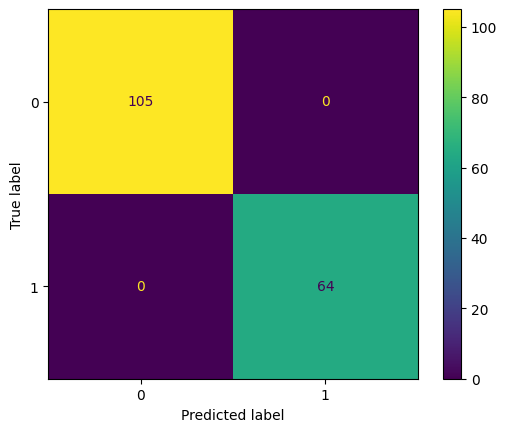

In [27]:
predictions = rbf_classifier.predict(x_monk2_tr)

cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Linear kernel
For the SVM with an linear kernel, the hyperparameter we can work on is *C*.

In [ ]:
C_range = np.logspace(-2, 10, 50, base = 2)

param_grid = dict(
    C = C_range
)

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'linear'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    verbose = 4
)

grid.fit(x_monk2_tr, y_monk2_tr)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ............................C=0.25;, score=0.608 total time=   0.0s
[CV 2/5] END ............................C=0.25;, score=0.627 total time=   0.0s
[CV 3/5] END ............................C=0.25;, score=0.569 total time=   0.0s
[CV 4/5] END ............................C=0.25;, score=0.647 total time=   0.0s
[CV 5/5] END ............................C=0.25;, score=0.627 total time=   0.0s
[CV 1/5] END .............C=0.29625223827969416;, score=0.608 total time=   0.0s
[CV 2/5] END .............C=0.29625223827969416;, score=0.627 total time=   0.0s
[CV 3/5] END .............C=0.29625223827969416;, score=0.549 total time=   0.0s
[CV 4/5] END .............C=0.29625223827969416;, score=0.569 total time=   0.0s
[CV 5/5] END .............C=0.29625223827969416;, score=0.627 total time=   0.0s
[CV 1/5] END ..............C=0.3510615547429147;, score=0.608 total time=   0.0s
[CV 2/5] END ..............C=0.3510615547429147

In [ ]:
linear_classifier = SVC(
    C = grid.best_params_['C'],
    kernel = 'linear'
)

linear_classifier.fit(x_monk2_tr, y_monk2_tr)

In [ ]:
predictions = linear_classifier.predict(x_monk2_tr)

cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Polynomial kernel
For the SVM with an linear kernel, the hyperparameters we can work on are *C*, *gamma* and *degree*.

In [ ]:
degree_range = np.arange(2, 10, 1)
C_range = np.logspace(-2, 10, 10, base = 2)
gamma_range = np.logspace(-9, 3, 10, base = 2)

param_grid = dict(
    degree = degree_range,
    C = C_range,
    gamma = gamma_range
)

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'poly'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    verbose = 4
)

grid.fit(x_monk2_tr, y_monk2_tr)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

In [ ]:
poly_classifier = SVC(
    C = grid.best_params_['C'],
    gamma = grid.best_params_['gamma'],
    degree = grid.best_params_['degree'],
    kernel = 'poly'
)
poly_classifier.fit(x_monk2_tr, y_monk2_tr)

In [ ]:
predictions = poly_classifier.predict(x_monk2_tr)

cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Model selection
After the model selection of SVC with different kind of kernels, we are going to select the best one.
Since a high C means that the model has a higer complexity (because of the SLT) and the risk is higher, we prefer to choose the SVM that uses polynomial as kernel, since C is low (and it means we have a low complexity due to the regularization).

In [ ]:
#Save the polynomial model
joblib.dump(poly_classifier, './results/monk2/SVM/poly_svm_monk2.z')

### Model assestment
After we have chosen the best model, we evaluate it using the test set and checking if the accuracy is satisfactory.

In [ ]:
svm_monk2 = joblib.load('./results/monk2/SVM/poly_svm_monk2.z')

In [ ]:
score2 = svm_monk2.score(x_monk2_ts, y_monk2_ts)

In [ ]:
print("Final accuracy on the test set: " + str(score2))

In [ ]:
predictions = svm_monk2.predict(x_monk2_ts)

cm = confusion_matrix(y_monk2_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Monk 3

In [ ]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk3_tr = pd.read_csv("./dataset/monk3/monks-3.train", sep = " ", skipinitialspace=True, names = colnames)
monk3_tr = monk3_tr.drop('id', axis = 1)

monk3_ts = pd.read_csv("./dataset/monk3/monks-3.test", sep = " ", skipinitialspace=True, names = colnames)
monk3_ts = monk3_ts.drop('id', axis = 1)

In [ ]:
x_monk3_tr = monk3_tr.iloc[:, 1:7].values
y_monk3_tr = monk3_tr.iloc[:, 0].values

x_monk3_ts = monk3_ts.iloc[:, 1:7].values
y_monk3_ts = monk3_ts.iloc[:, 0].values

In [ ]:
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk3_tr)
x_monk3_tr = one_hot_encoder_tr.transform(x_monk3_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk3_ts)
x_monk3_ts = one_hot_encoder_ts.transform(x_monk3_ts)

### Grid search

#### RBF kernel
For the SVM with an RBF kernel, the hyperparameters we can work on are *C* and *gamma*.

In [ ]:
C_range = np.logspace(-2, 5, 30, base = 2)
gamma_range = np.logspace(-9, 3, 30, base = 2)

param_grid = dict(
    gamma = gamma_range,
    C = C_range
)

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'rbf'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    verbose = 4
)

grid.fit(x_monk3_tr, y_monk3_tr)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

In [ ]:
rbf_classifier = SVC(
    C = grid.best_params_['C'],
    gamma = grid.best_params_['gamma'],
    kernel = 'rbf'
)
rbf_classifier.fit(x_monk3_tr, y_monk3_tr)

In [ ]:
predictions = rbf_classifier.predict(x_monk3_tr)

cm = confusion_matrix(y_monk3_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Linear kernel
For the SVM with an linear kernel, the hyperparameter we can work on is *C*.

In [ ]:
C_range = np.logspace(-2, 10, 50, base = 2)

param_grid = dict(
    C = C_range
)

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'linear'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    verbose = 4
)

grid.fit(x_monk3_tr, y_monk3_tr)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

In [ ]:
linear_classifier = SVC(
    C = grid.best_params_['C'],
    kernel = 'linear'
)

linear_classifier.fit(x_monk3_tr, y_monk3_tr)

In [ ]:
predictions = linear_classifier.predict(x_monk2_tr)

cm = confusion_matrix(y_monk2_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Polynomial kernel
For the SVM with an linear kernel, the hyperparameters we can work on are *C*, *gamma* and *degree*.

In [ ]:
degree_range = np.arange(2, 10, 1)
C_range = np.logspace(-2, 10, 10, base = 2)
gamma_range = np.logspace(-9, 3, 10, base = 2)

param_grid = dict(
    degree = degree_range,
    C = C_range,
    gamma = gamma_range
)

cv = StratifiedShuffleSplit(
    n_splits=5,
    test_size=0.3
)

grid = GridSearchCV(
    SVC(kernel = 'poly'),
    param_grid = param_grid,
    cv=cv,
    scoring = 'accuracy',
    verbose = 4
)

grid.fit(x_monk3_tr, y_monk3_tr)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

In [ ]:
poly_classifier = SVC(
    C = grid.best_params_['C'],
    gamma = grid.best_params_['gamma'],
    degree = grid.best_params_['degree'],
    kernel = 'poly'
)
poly_classifier.fit(x_monk3_tr, y_monk3_tr)

In [ ]:
predictions = poly_classifier.predict(x_monk3_tr)

cm = confusion_matrix(y_monk3_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Model selection
After the model selection of SVC with different kind of kernels, we are going to select the best one.
Even though the SVM with the rbf kernel has a higher C than the SVM with the polynomial kernel, since the error rate of the first one is lower than the second one, we prefer to use the first support vector machine. 

In [ ]:
#Save the rbf model
joblib.dump(rbf_classifier, './results/monk3/SVM/rbf_svm_monk3.z')

### Model assestment
After we have chosen the best model, we evaluate it using the test set and checking if the accuracy is satisfactory.

In [ ]:
svm_monk3 = joblib.load('./results/monk3/SVM/rbf_svm_monk3.z')

In [ ]:
score3 = svm_monk3.score(x_monk3_ts, y_monk3_ts)

In [ ]:
print("Final accuracy on the test set: " + str(score3))

In [ ]:
predictions = svm_monk3.predict(x_monk3_ts)

cm = confusion_matrix(y_monk3_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()